**Introduction:**

Peer-to-peer (P2P) lending represents an innovative method of peer-to-peer money lending, facilitated through online platforms. This study employs real-world data obtained from "Lending Club," an American-based company, to predict credit solvency(Binary Classification) using various predictive models and techniques, including Lasso, Ridge, Elastic-Net, Logistic Regression, Extreme Gradient Boosting, and Bayesian Additive Regression Trees (BART). Through an economic evaluation of the context and the results obtained from the models, this study aims to draw conclusions regarding credit risk assessment in the P2P lending market.

The original data set is large: 1.6 GB csv file. It was scraped from the Lending Club website by some guy on github.
We downloaded it from kaggle:
 https://www.kaggle.com/datasets/wordsforthewise/lending-club?select=accepted_2007_to_2018Q4.csv.gz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 150

In [2]:
path= "C:\\Users\\giuse\\OneDrive\\Desktop\\uni venezia\\terzo periodo\\models and technologies for the financial industry\\lending_club_large\\accepted_2007_to_2018q4.csv\\accepted_2007_to_2018Q4.csv"
df = pd.read_csv(path, low_memory = False)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None


In [3]:


#selecting the variables of our interest
cols_to_keep = [
    "annual_inc","application_type","dti","earliest_cr_line","emp_length","fico_range_high","fico_range_low","grade",
    "home_ownership","inq_last_6mths","installment","int_rate","issue_d","loan_amnt","loan_status","mo_sin_rcnt_tl",
    "mort_acc","mths_since_recent_bc","disbursement_method","verification_status","term","tax_liens","sub_grade",
    "purpose","pub_rec_bankruptcies","percent_bc_gt_75","num_bc_tl","num_actv_rev_tl","num_actv_bc_tl","num_accts_ever_120_pd",
    "acc_now_delinq","acc_open_past_24mths","open_acc","pct_tl_nvr_dlq","pub_rec","total_acc","total_bal_ex_mort"
]

df = df[cols_to_keep]
df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)



Most of the columns we removed had NAs on a large portion of the dataset.
Also some columns already contained information on the loan default

The features we kept have information on the borrower's income, employment, previous credit history, on the loan interest, purpose, duration.

The loan_status variable is the target feature of our analysis

In [4]:
df.loan_status.value_counts()

loan_status
Fully Paid            953502
Current               803484
Charged Off           234903
Late (31-120 days)     19341
In Grace Period         7745
Late (16-30 days)       3853
Default                   33
Name: count, dtype: int64

We need to group it into two classes: default = 1 and default = 0

Also we will drop current loans, since at the time the data was scraped from Lending Club website it wasn't known if the loan defaulted or not.

In [5]:
df = df[df.loan_status != "Current"] #dropping current loans

default_categories = ['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']
loan_status_dummy = df.loan_status.isin(default_categories)
loan_status_dummy = loan_status_dummy.astype("uint8")
df.loan_status = loan_status_dummy

df.reset_index(inplace = True, drop = True)

## Variables' descriptions

In [6]:
pd.set_option("display.max_rows",300)
description =  pd.read_csv("description_col.csv",index_col="Nome_Variabile")
description

,Descrizione,Data_Type
Nome_Variabile,,
annual_inc,The combined self-reported annual income provi...,float64
application_type,Indicates whether the loan is an individual ap...,object
dti,A ratio calculated using the co-borrowers' tot...,float64
earliest_cr_line,Earliest credit line at time of application f...,object
emp_length,Employment length in years. Possible values ar...,object
fico_range_high,The upper boundary range the borrower’s FICO a...,float64
fico_range_low,The lower boundary range the borrower’s FICO a...,float64
grade,LC assigned loan grade,object
home_ownership,The home ownership status provided by the borr...,object


## Data visualisation


We will start with numeric, continuous variables

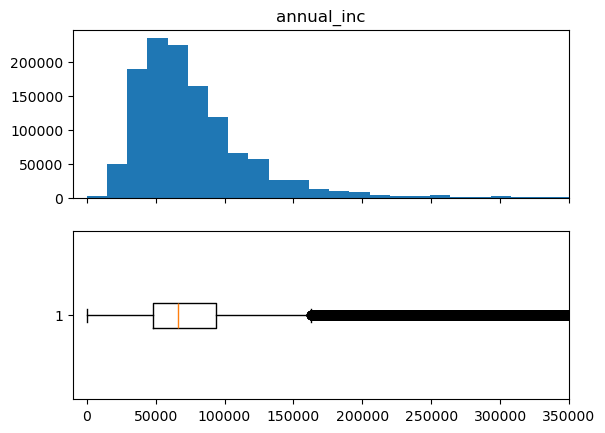

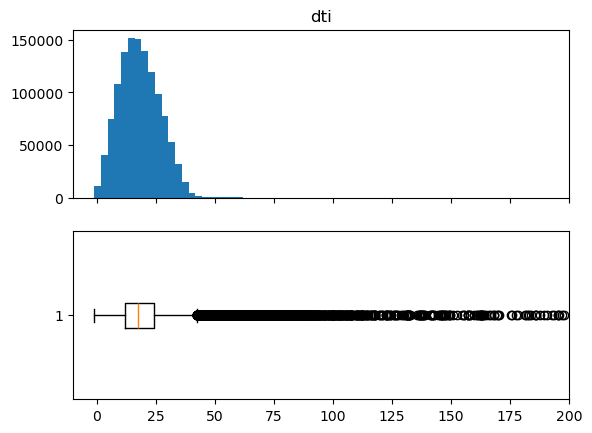

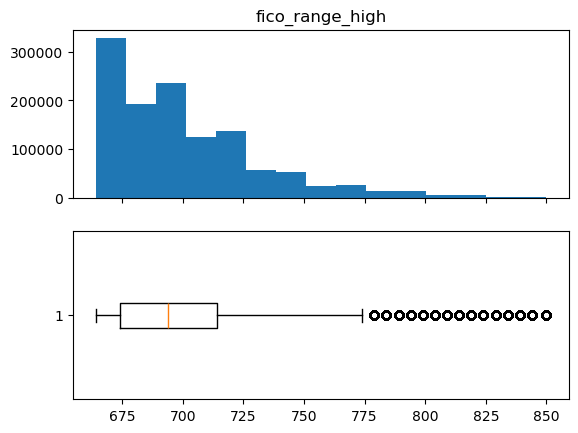

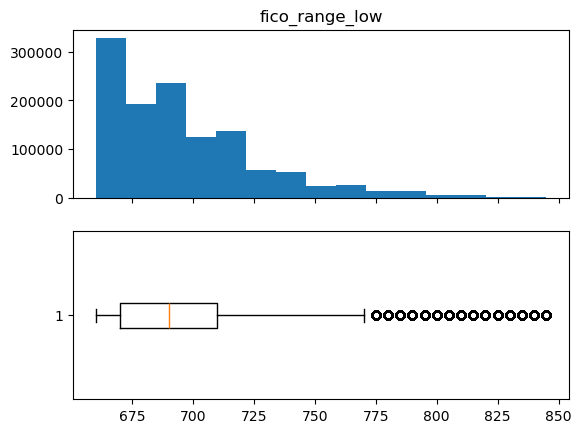

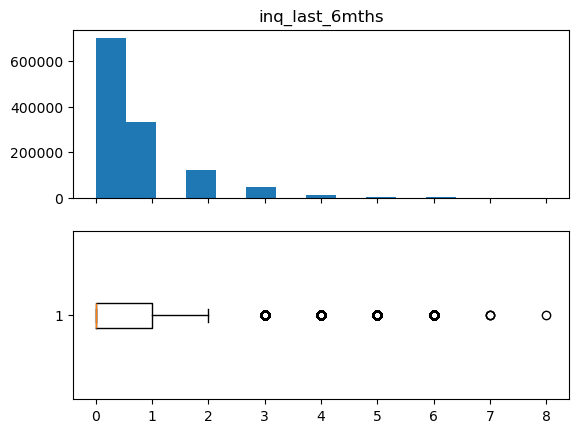

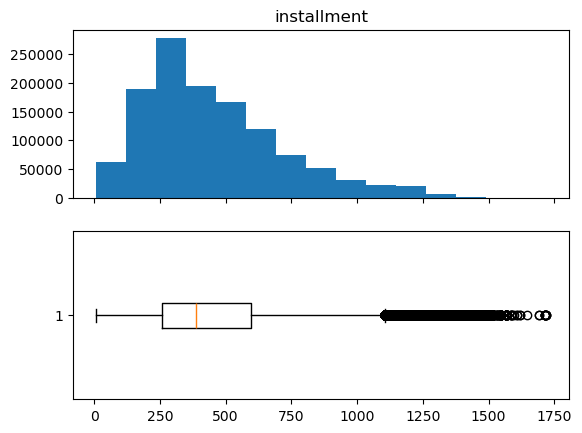

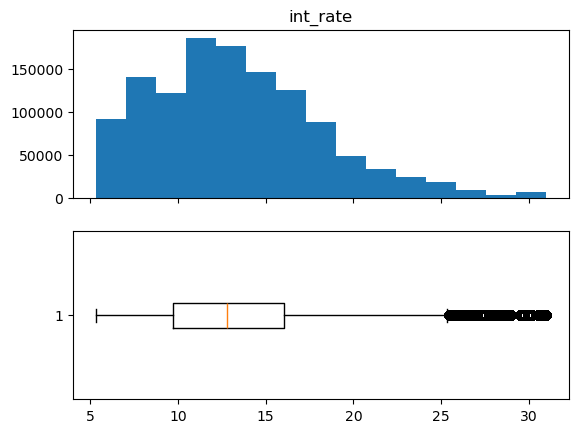

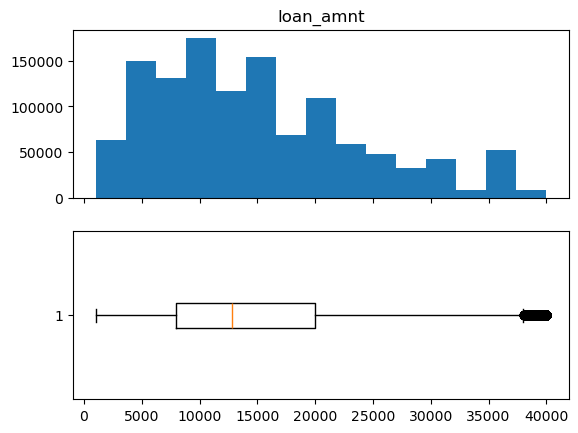

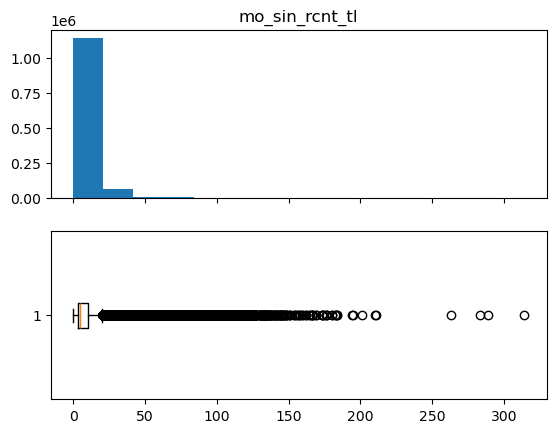

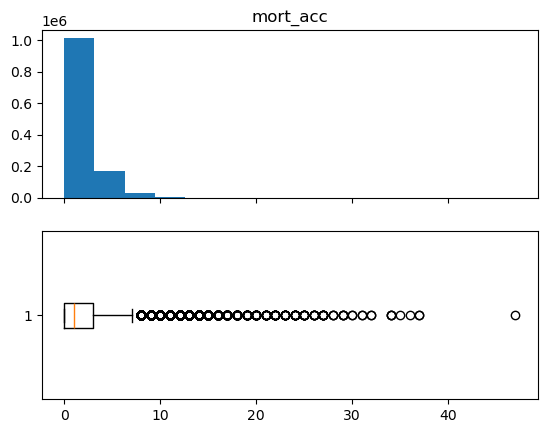

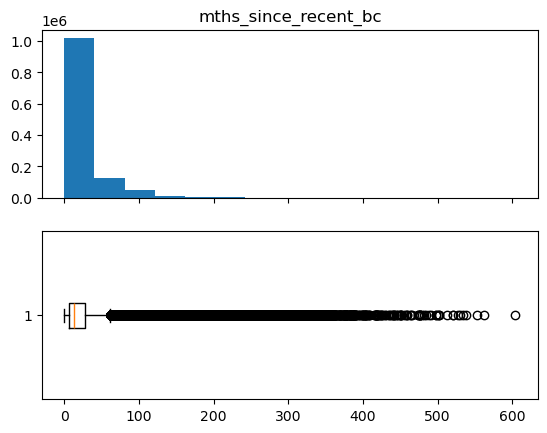

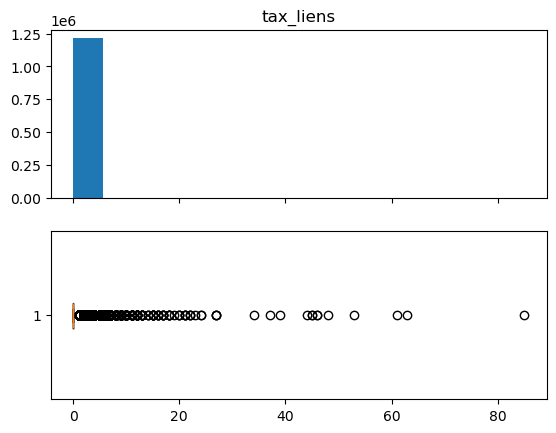

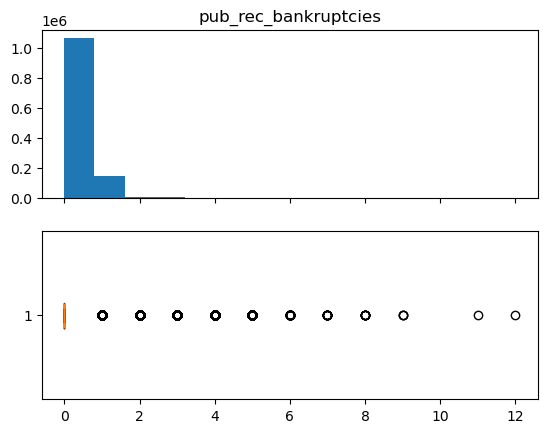

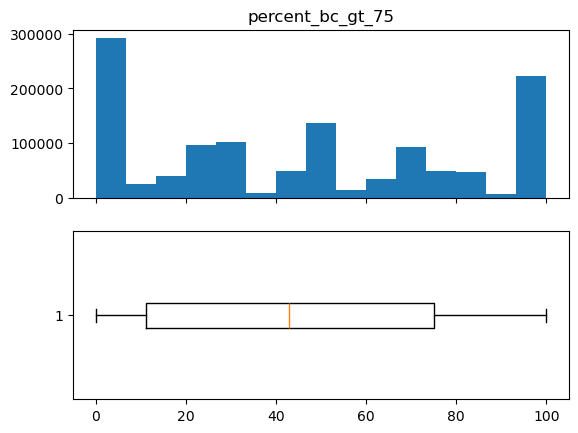

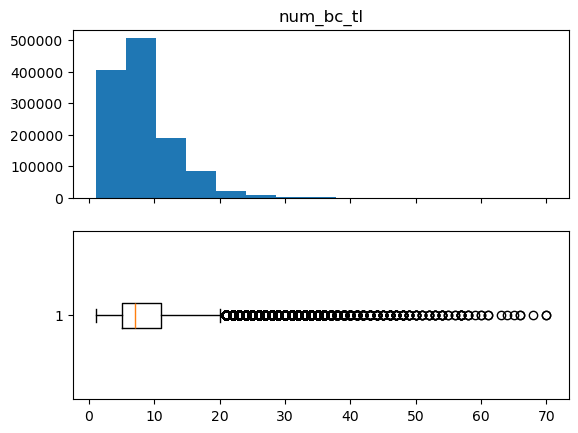

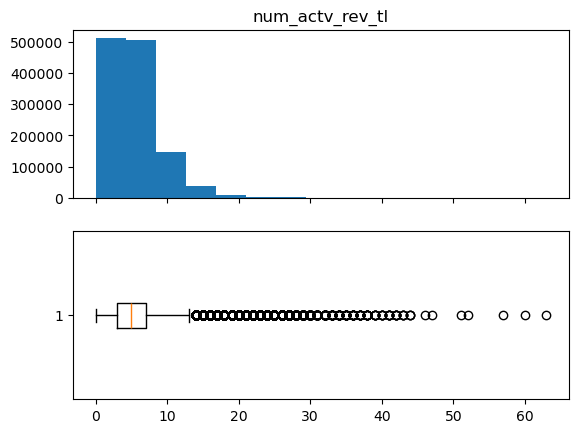

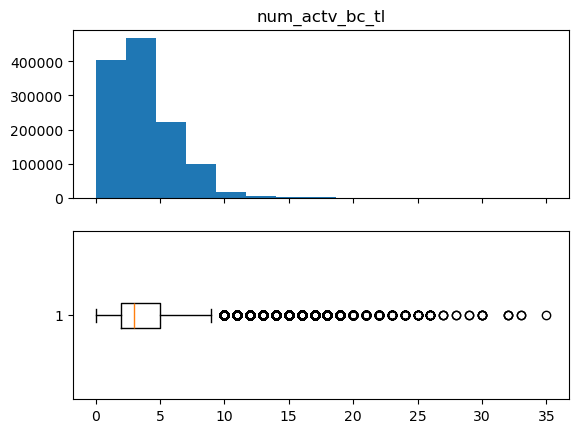

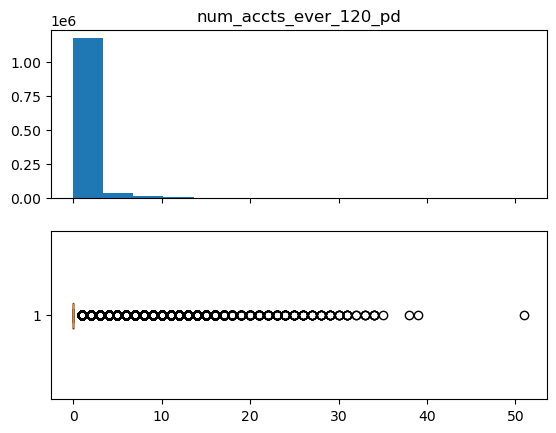

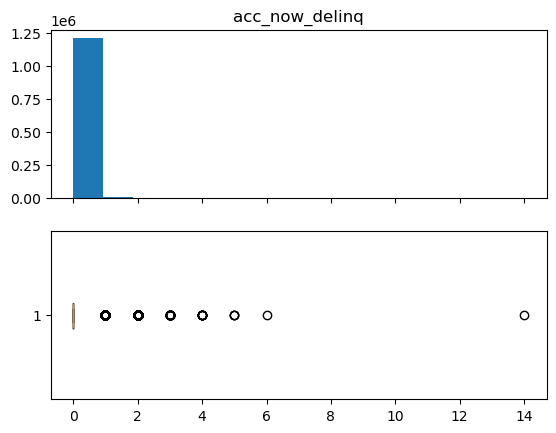

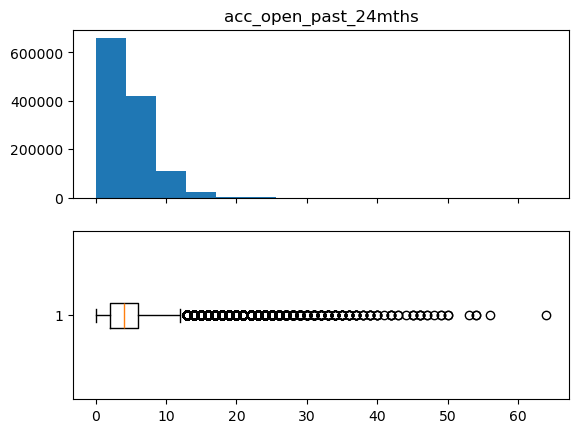

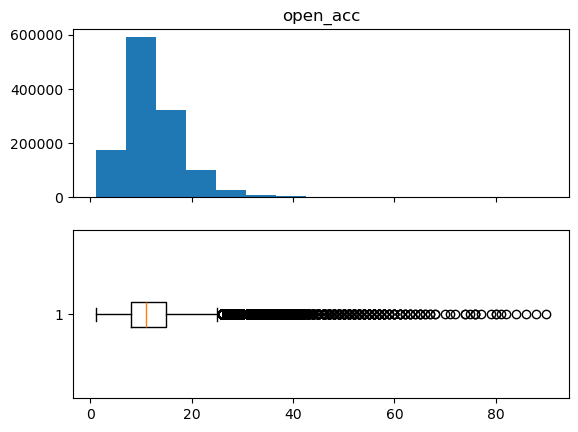

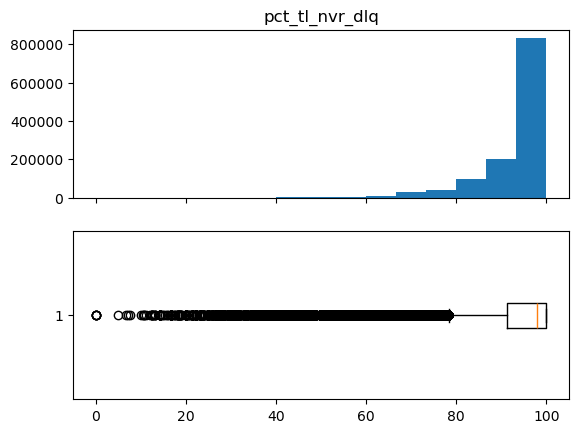

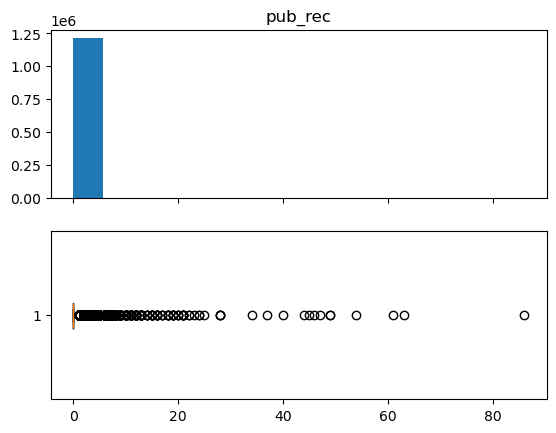

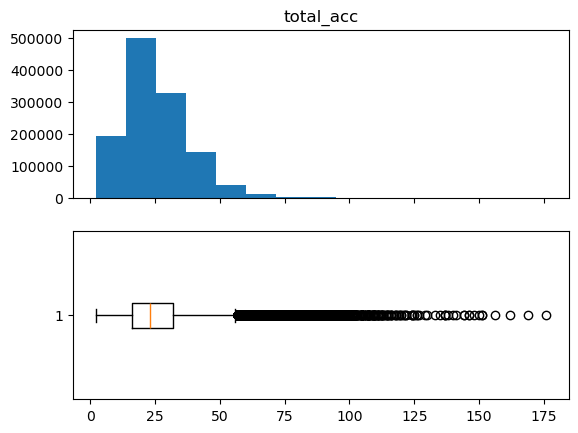

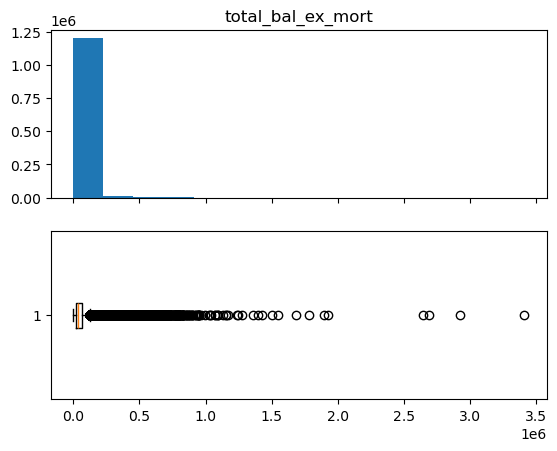

In [7]:
numeric_vars = df.columns[df.dtypes == "float64"]

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
ax1.hist(df["annual_inc"], bins = 750)
ax2.boxplot(df["annual_inc"], vert = False)
ax1.set_title("annual_inc")
ax1.set_xlim(-10000, 350000)
ax2.set_xlim(-10000, 350000)
plt.show()

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
ax1.hist(df["dti"], bins = 350)
ax2.boxplot(df["dti"], vert = False)
ax1.set_title("dti")
ax1.set_xlim(-10, 200)
ax2.set_xlim(-10, 200)
plt.show()

for var in numeric_vars:
    if var not in ["annual_inc","dti"]:
        fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
        ax1.hist(df[var], bins = 15)
        ax2.boxplot(df[var], vert = False)
        ax1.set_title(var)
        plt.show()

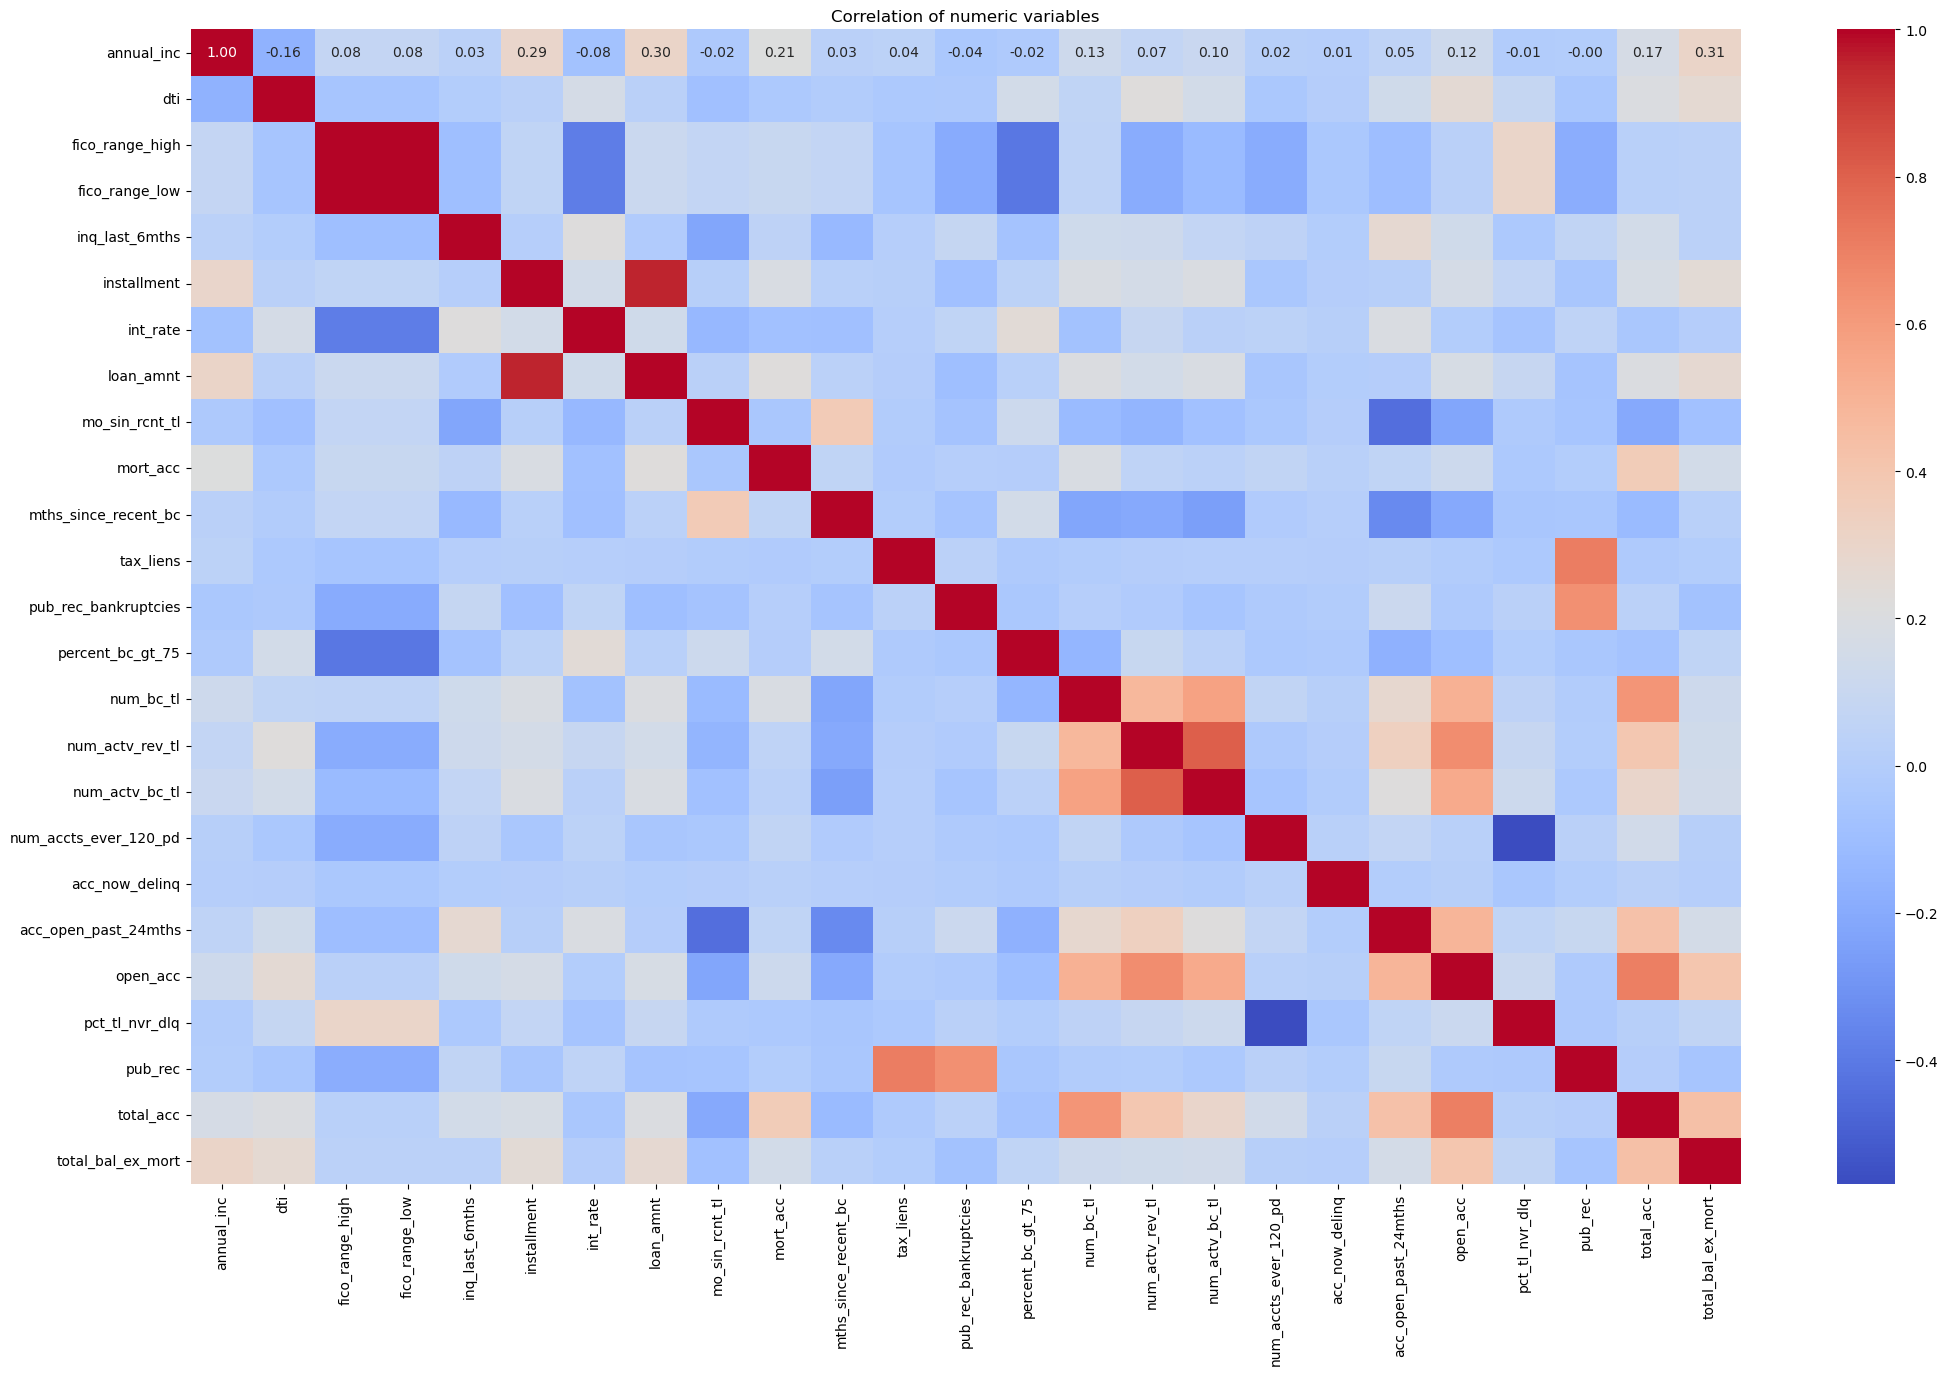

In [8]:
correlation_matrix = df[numeric_vars].corr()
plt.figure(figsize=(25,15))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation of numeric variables")
plt.show()

We can see that there are some variables that are highly correlated and just provide the same information: FICO range high and FICO range low; loan amount and installment. Regularization techinques will help dealing with this problem

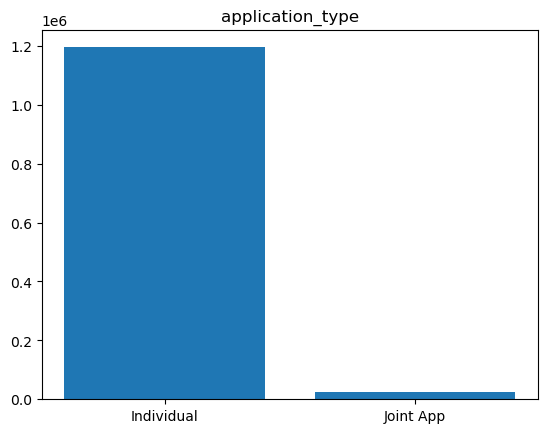

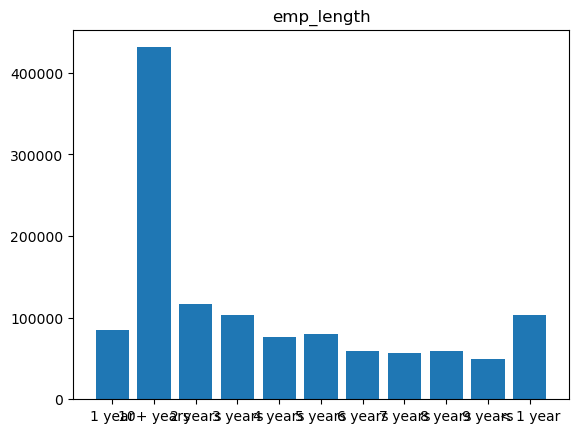

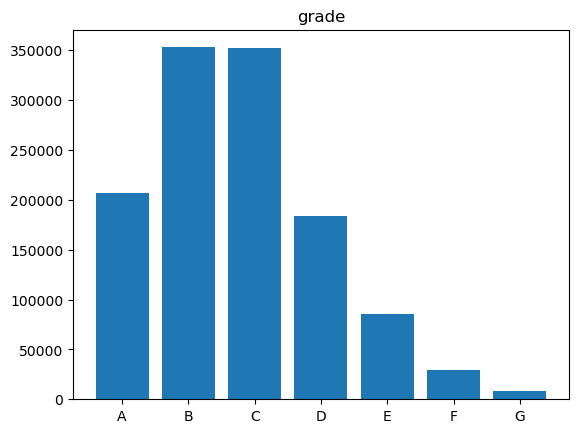

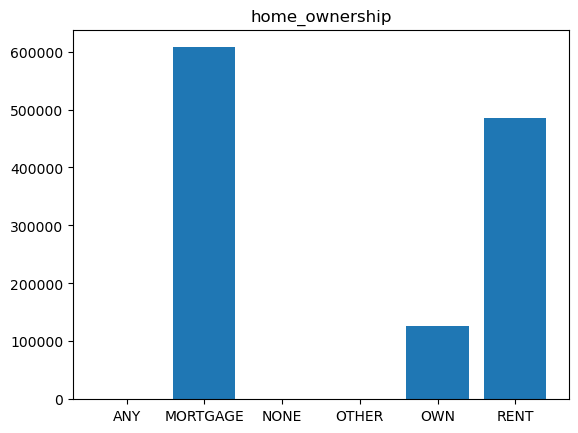

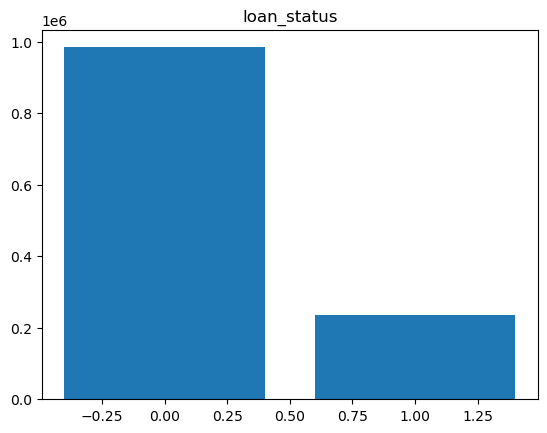

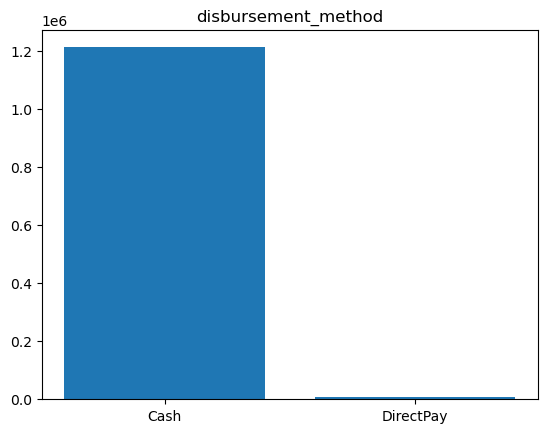

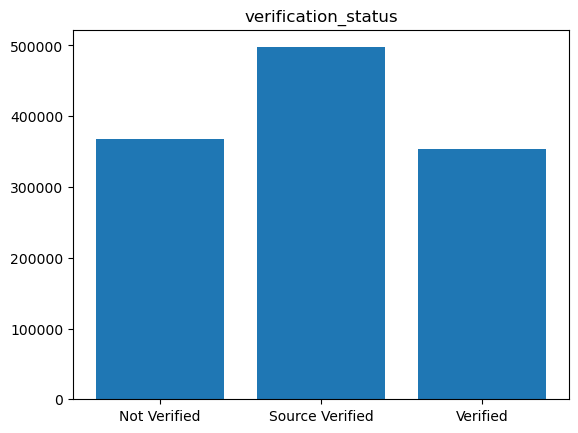

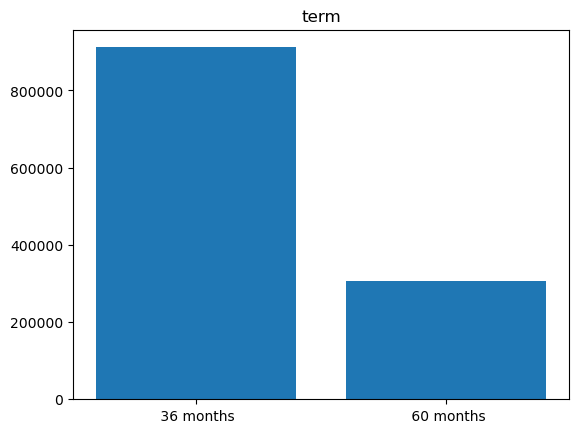

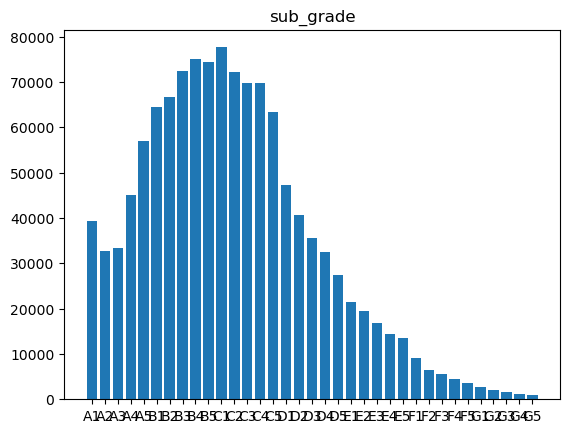

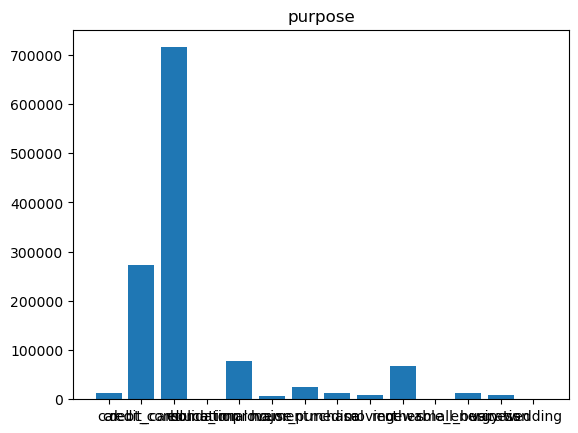

In [9]:
categorical_vars = df.columns[df.dtypes != "float64"]

for var in categorical_vars:
    if var not in ["earliest_cr_line", "issue_d"]:
        data = df[var].groupby(df[var]).count()
        plt.bar(x = data.index, height= data.to_numpy())
        plt.title(var)
        plt.show()

Again we see that some features contain the same information: Grade and Subgrade.




## Encoding categorical variables

We will need to transform the categorical variables to numeric ones.

In [10]:
from sklearn.preprocessing import OrdinalEncoder

term_dummies = pd.get_dummies(df.term,prefix= "term")
df = pd.concat([df, term_dummies], axis = 1)
df.drop(columns = ["term",'term_ 36 months'],inplace = True)
#we need to drop one class to avoid perfect collinearity
# we will drop 36 months since it is the highest frequency class

#subgrade
enc = OrdinalEncoder()
sub_grade_encoded = pd.Series(enc.fit_transform(df.sub_grade.array.reshape(-1,1)).flatten())
sub_grade_encoded = sub_grade_encoded*-1 # we invert the rating: highest grade has the highest number
df.sub_grade = sub_grade_encoded

#grade
enc = OrdinalEncoder()
grade_encoded = pd.Series(enc.fit_transform(df.grade.array.reshape(-1,1)).flatten())
grade_encoded = grade_encoded*-1 # we invert the rating: highest grade has the highest number
df.grade = grade_encoded

#home ownership
# we will first collapse some classes into one: any, none and other will be grouped together
df.home_ownership[df.home_ownership == "ANY"] = "OTHER"
df.home_ownership[df.home_ownership == "NONE"] = "OTHER"

home_ownership_dummies = pd.get_dummies(df.home_ownership,prefix= "home_ownership")
df = pd.concat([df, home_ownership_dummies], axis = 1)
df.drop(columns = ["home_ownership",'home_ownership_MORTGAGE'],inplace = True)
#we need to drop one class to avoid perfect collinearity
# we will drop MORTGAGE since it is the highest frequency class

# verification status
verification_status_dummies = pd.get_dummies(df.verification_status,prefix= "verification_status")
df = pd.concat([df, verification_status_dummies], axis = 1)
df.drop(columns = ["verification_status",'verification_status_Source Verified'],inplace = True)
#we need to drop one class to avoid perfect collinearity
# we will drop Source Verified since it is the highest frequency class

#purpose
# first we group educational with other because there is only one instance of it
df.purpose[df.purpose == "educational"] = "other"
purpose_dummies = pd.get_dummies(df.purpose,prefix= "purpose")
df = pd.concat([df, purpose_dummies], axis = 1)
df.drop(columns = ["purpose",'purpose_debt_consolidation'],inplace = True)
#we need to drop one class to avoid perfect collinearity
# we will drop educational because there is only one value

#application_type
application_type_dummies = pd.get_dummies(df.application_type,prefix= "application_type")
df = pd.concat([df, application_type_dummies], axis = 1)
df.drop(columns = ["application_type",'application_type_Individual'],inplace = True)
#we need to drop one class to avoid perfect collinearity
# we will drop application_type since it is the highest frequency class

# disbursement_method
disbursement_method_dummies = pd.get_dummies(df.disbursement_method,prefix= "disbursement_method")
df = pd.concat([df, disbursement_method_dummies], axis = 1)
df.drop(columns = ["disbursement_method",'disbursement_method_Cash'],inplace = True)
#we need to drop one class to avoid perfect collinearity
# we will drop Cash since it is the highest frequency class

#emp_length
emp_length_map = {
    "1 year": 1,
    "10+ years":10,
    "2 years":2,
    "3 years":3,
    "4 years":4,
    "5 years":5,
    "6 years":6,
    "7 years":7,
    "8 years":8,
    "9 years":9,
    "< 1 year" : 0
}

df.emp_length = df.emp_length.map(emp_length_map)



C:\Users\giuse\AppData\Local\Temp\ipykernel_6868\934061891.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.home_ownership[df.home_ownership == "ANY"] = "OTHER"
C:\Users\giuse\AppData\Local\Temp\ipykernel_6868\934061891.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.home_ownership[df.home_ownership == "NONE"] = "OTHER"
C:\Users\giuse\AppData\Local\Temp\ipykernel_6868\934061891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

We also have the variables Issue date and Earliest credit line that are a timestamp. We will encode it with an integer number, setting 0 for the earliest date and the highest number for the latest date

In [11]:
#earliest_credit_line
enc = OrdinalEncoder()
earliest_cr_line_encoded = pd.Series(enc.fit_transform(pd.to_datetime(df.earliest_cr_line, format = "%b-%Y").array.reshape(-1,1)).flatten())
df.earliest_cr_line = earliest_cr_line_encoded

#issue_date
enc = OrdinalEncoder()
issue_d_encoded = pd.Series(enc.fit_transform(pd.to_datetime(df.issue_d, format = "%b-%Y").array.reshape(-1,1)).flatten())
df.issue_d = issue_d_encoded

In [12]:
df.isna().sum().sum()

0

We now plot the variables' distributions according to class of target variable.

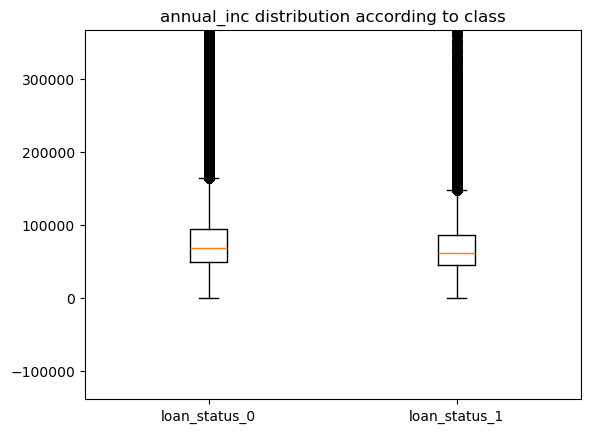

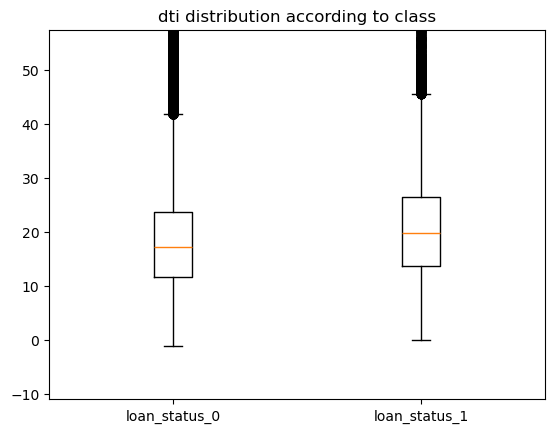

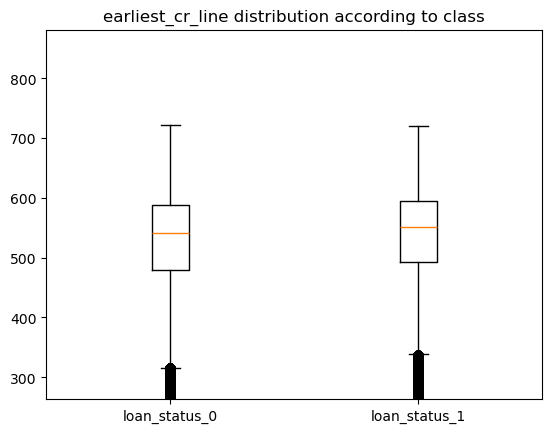

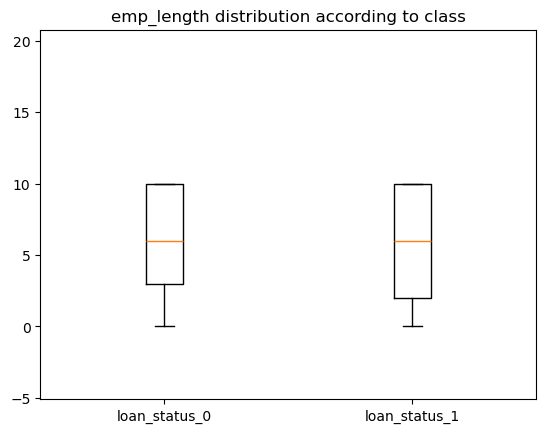

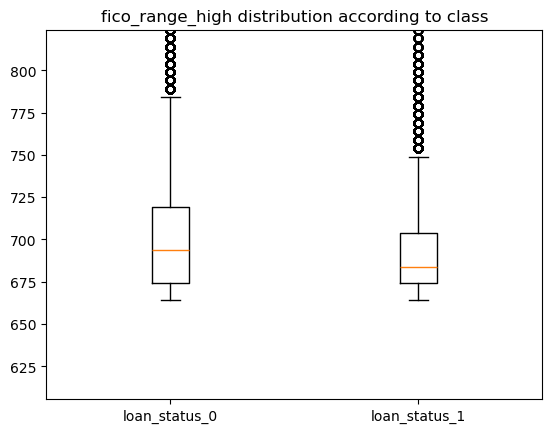

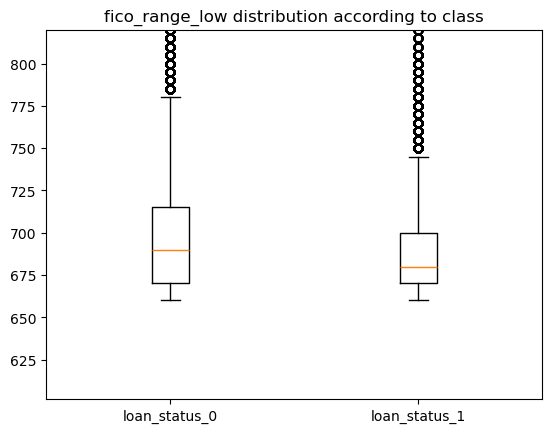

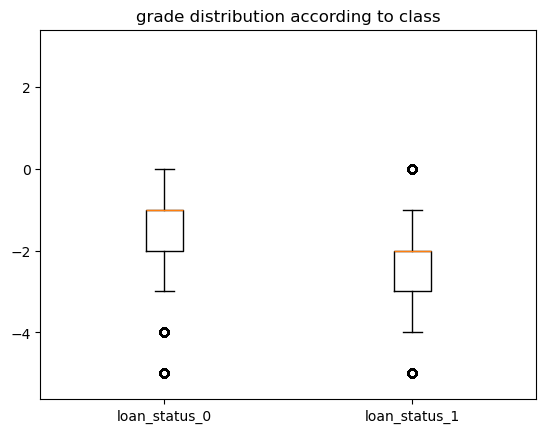

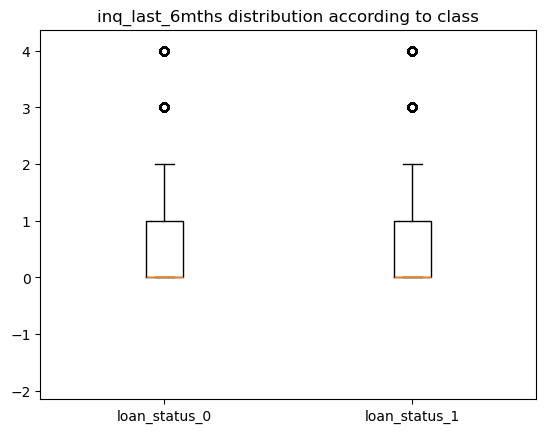

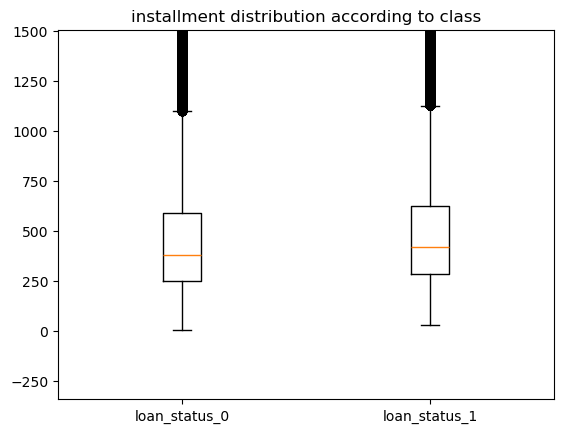

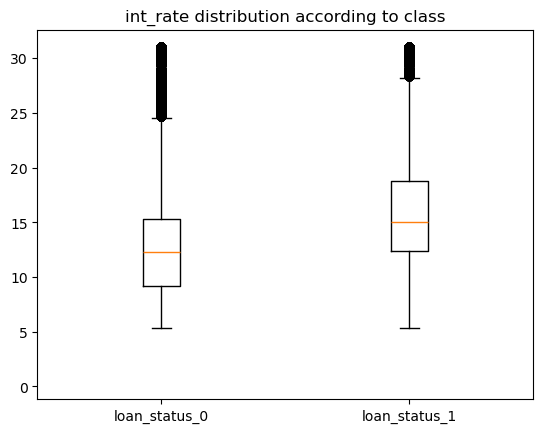

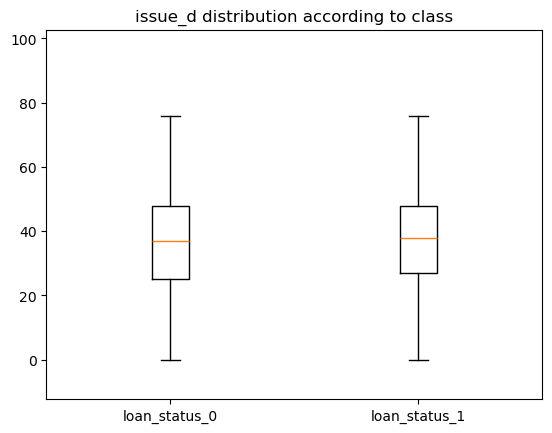

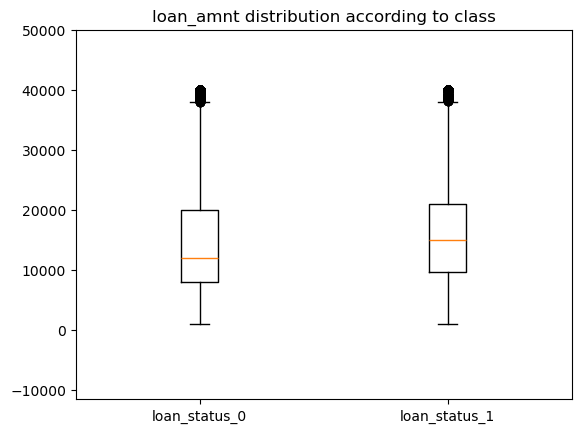

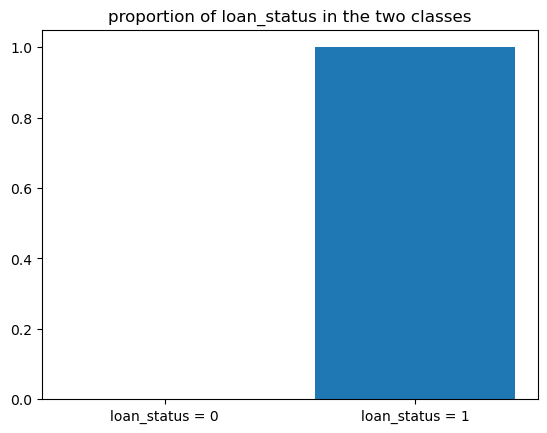

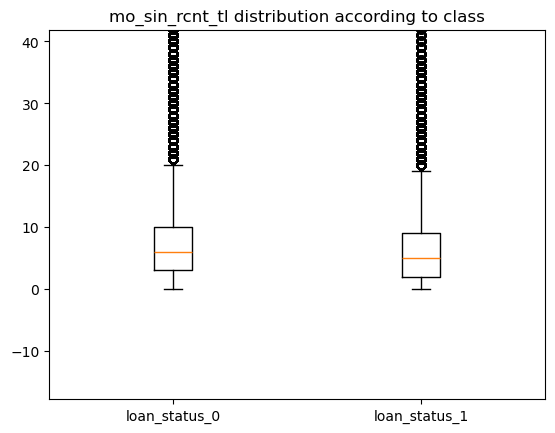

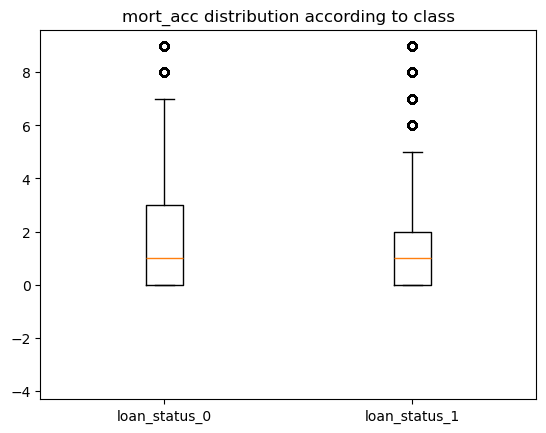

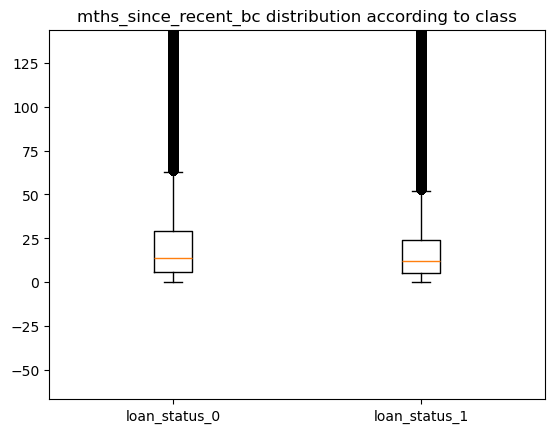

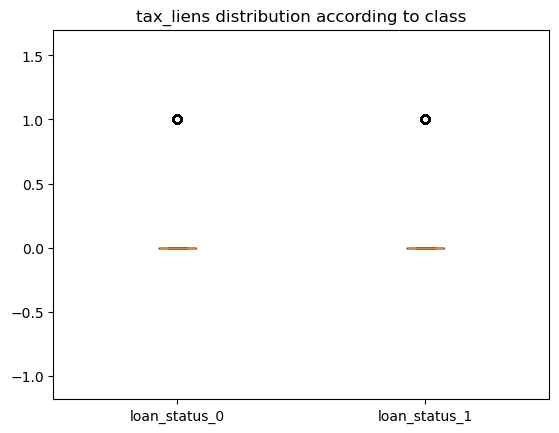

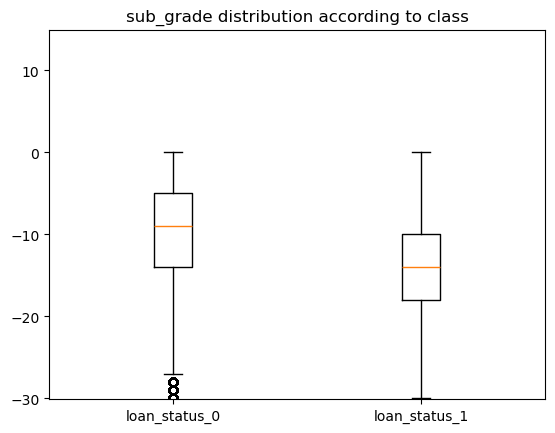

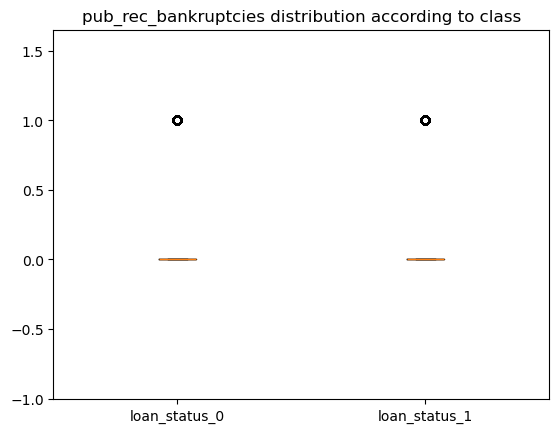

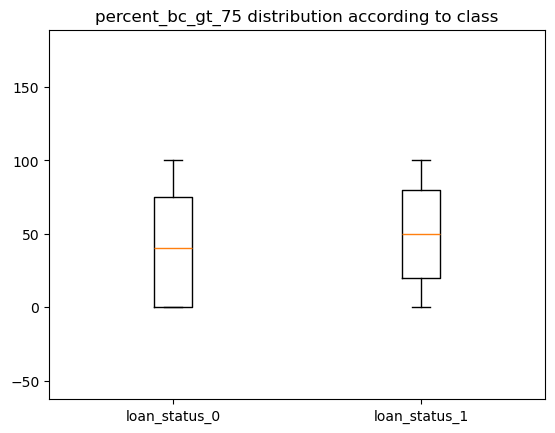

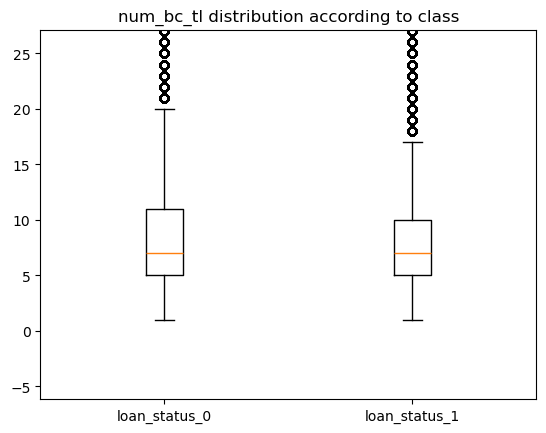

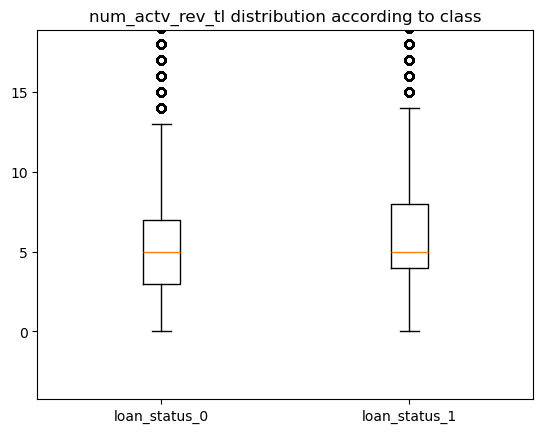

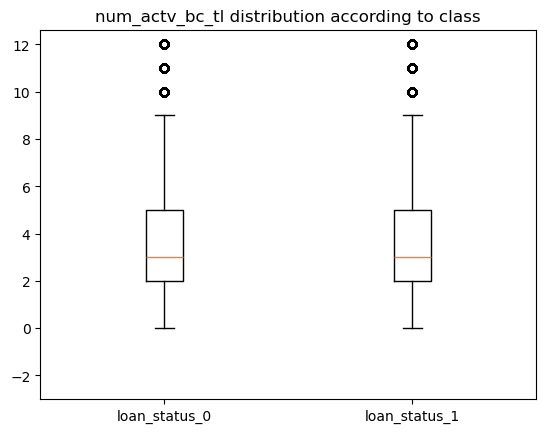

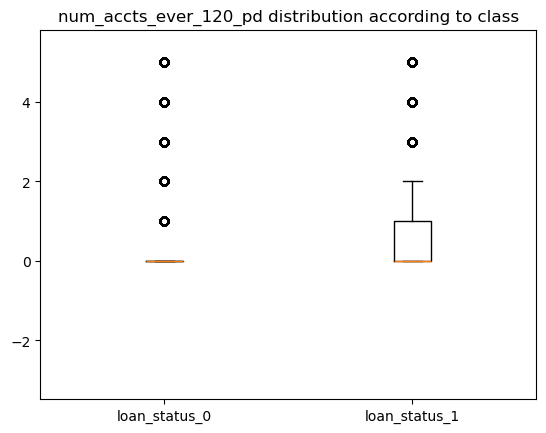

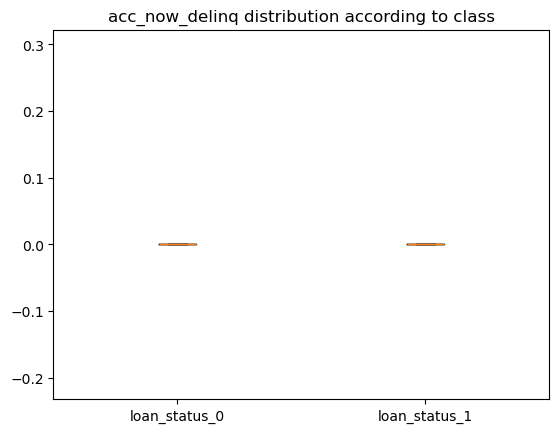

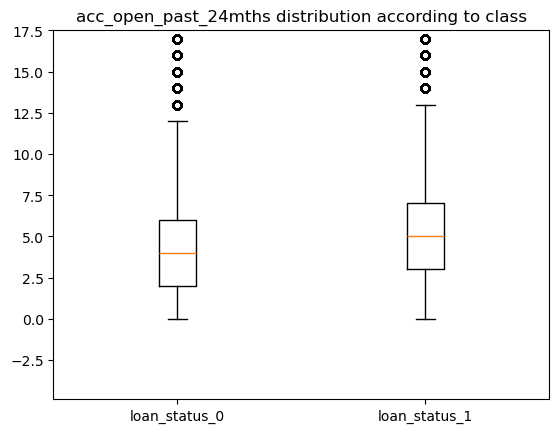

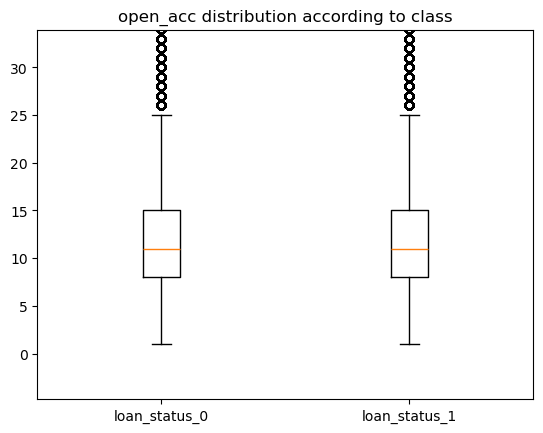

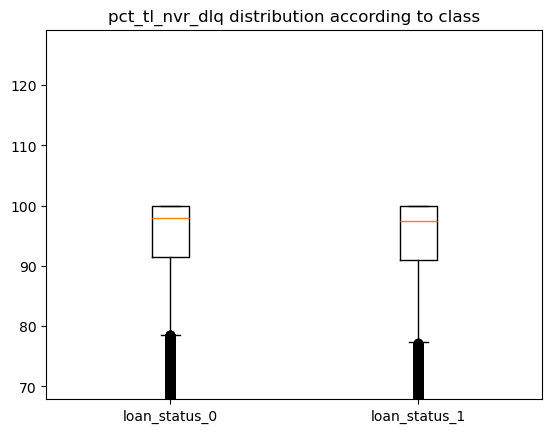

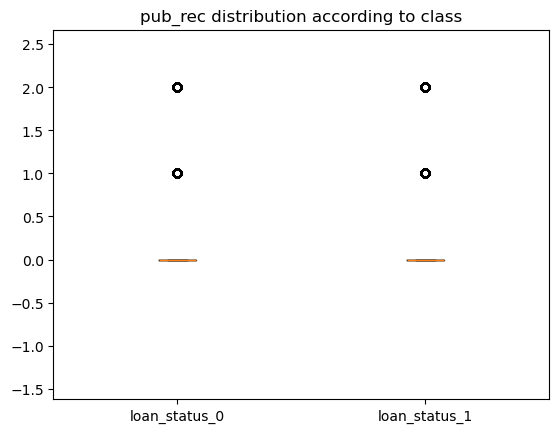

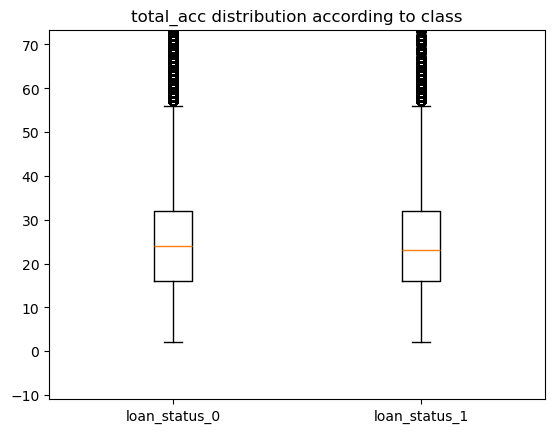

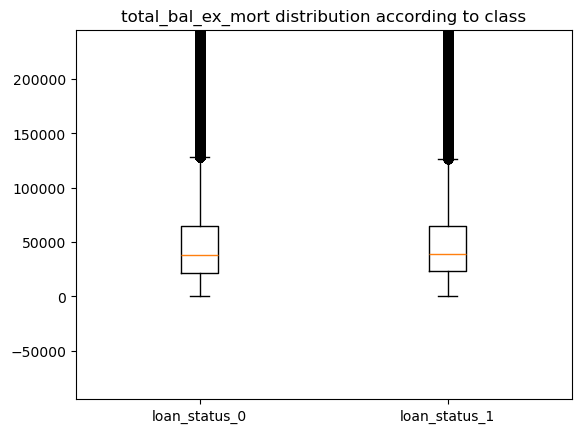

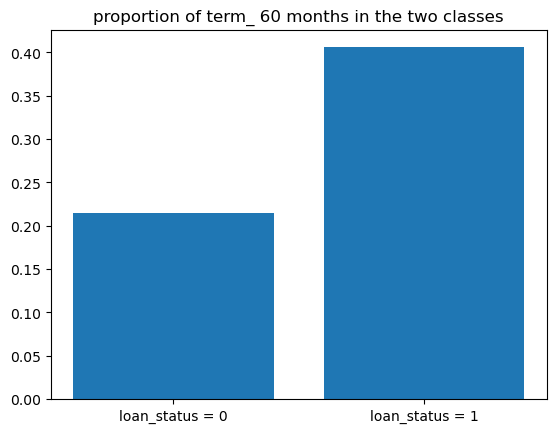

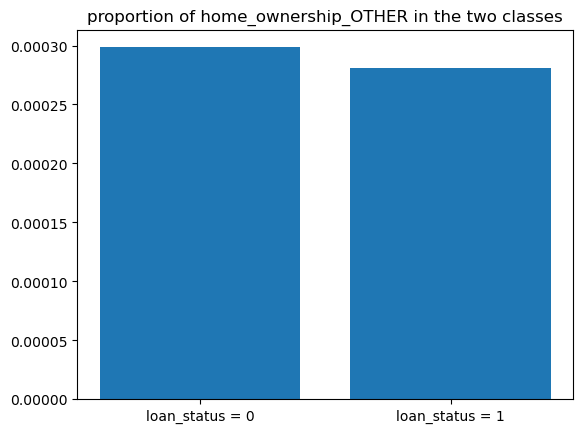

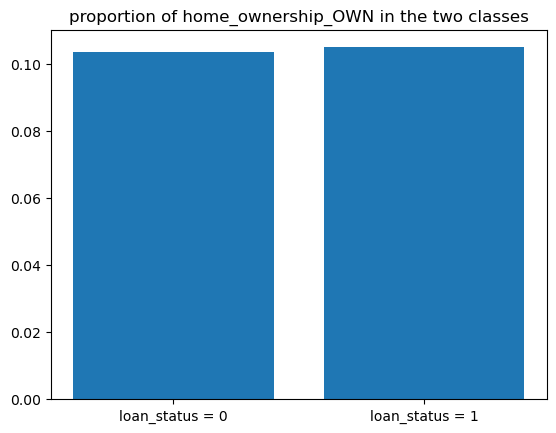

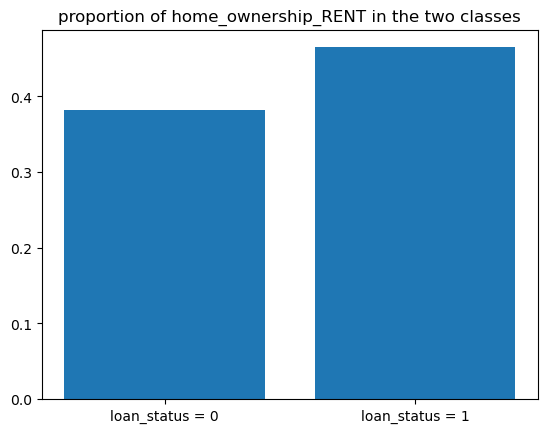

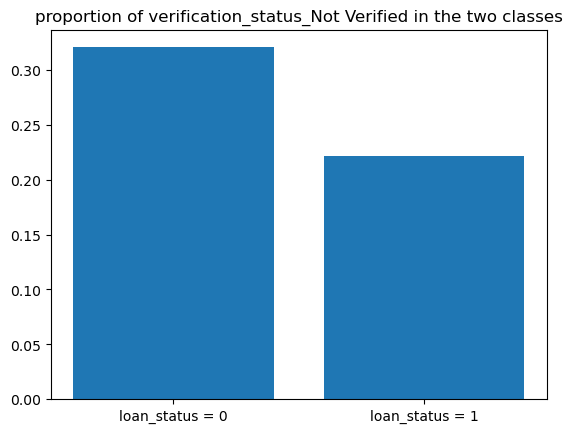

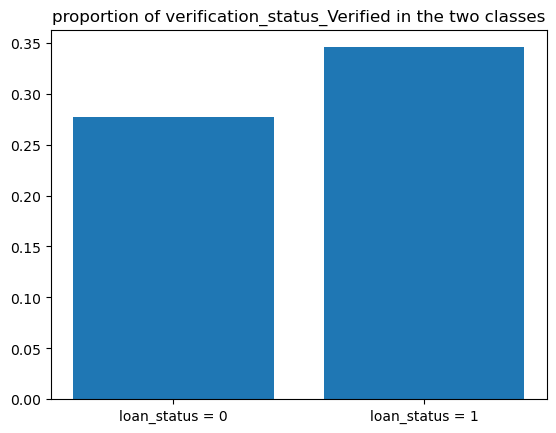

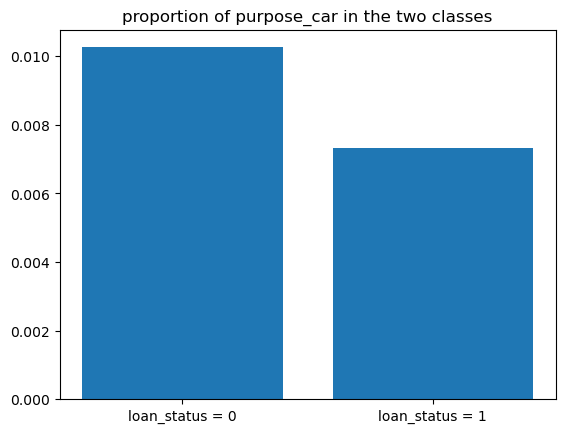

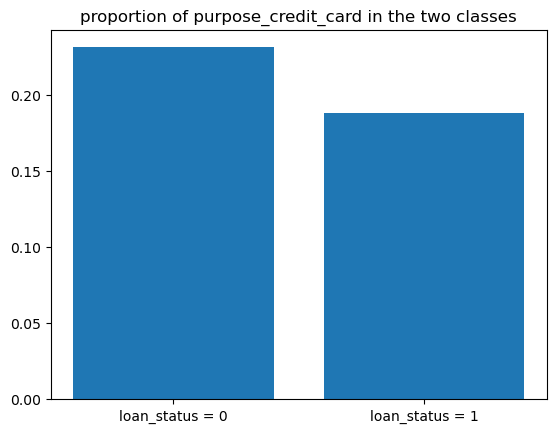

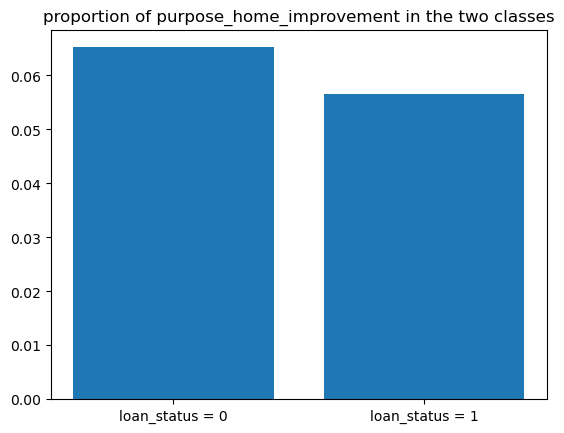

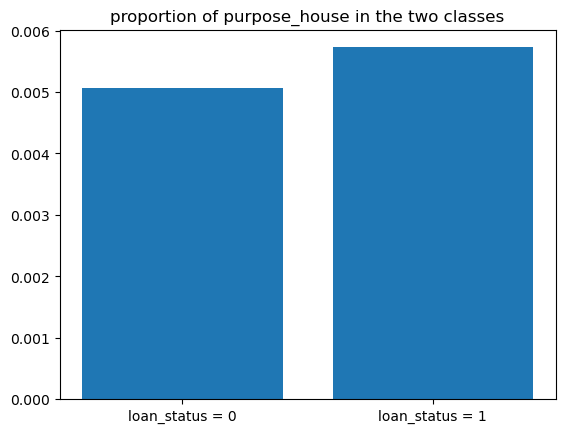

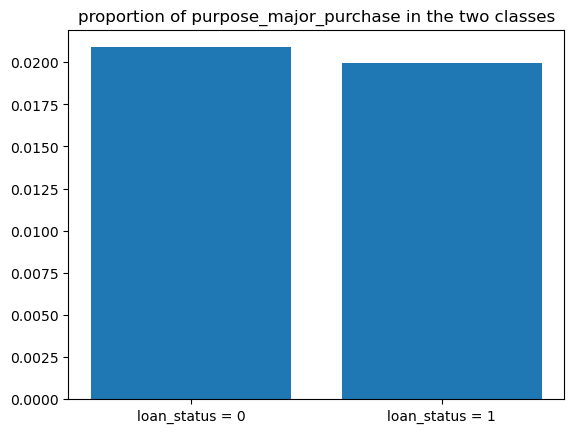

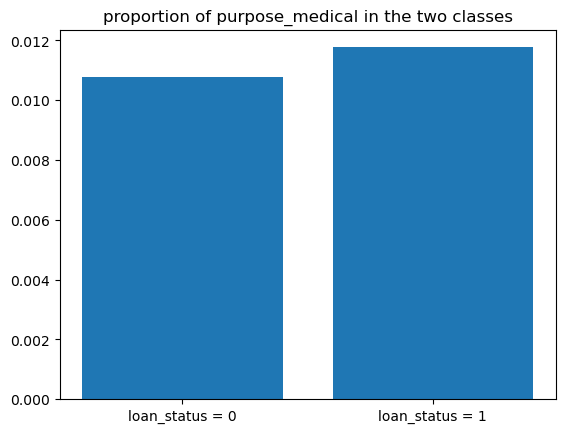

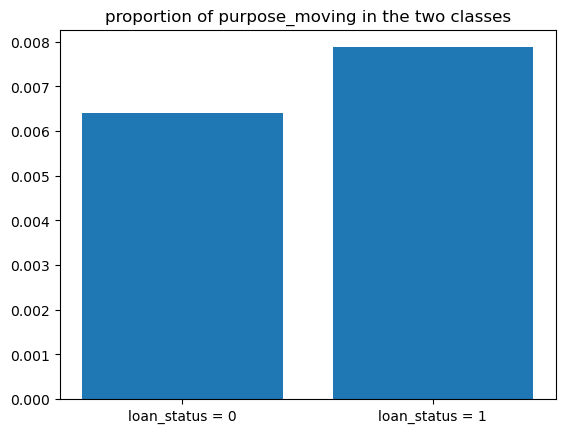

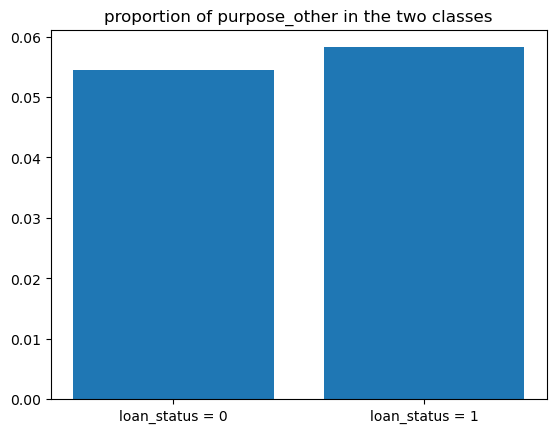

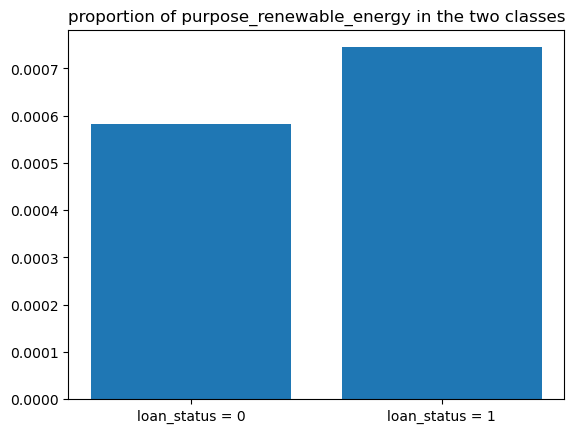

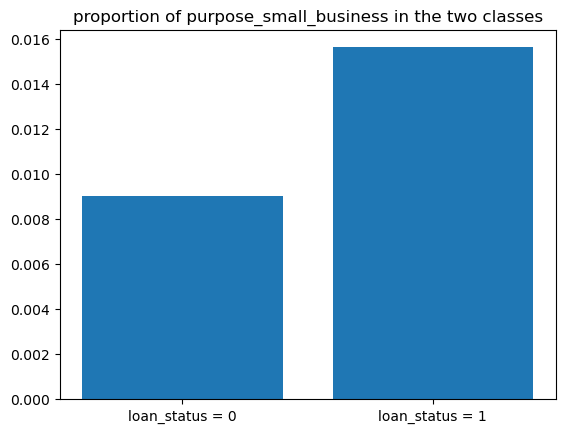

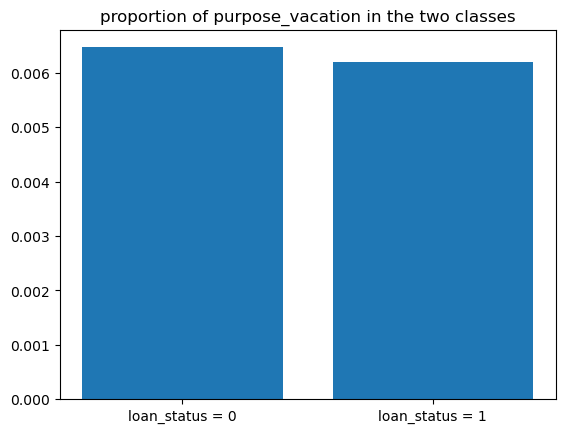

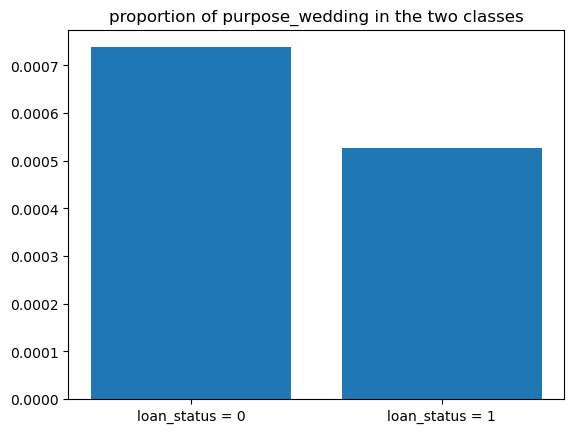

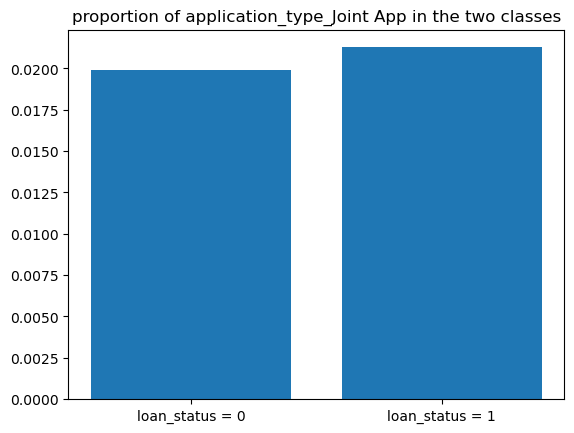

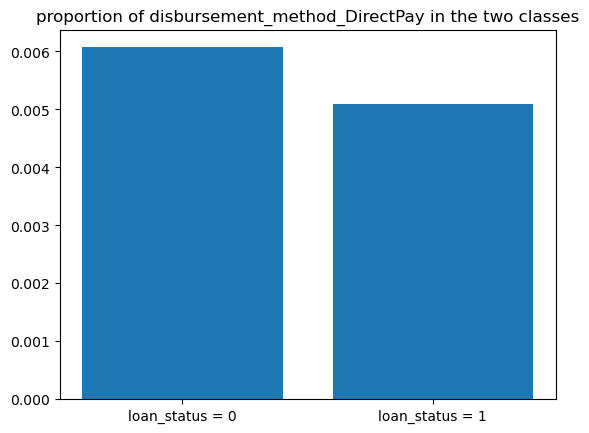

In [13]:
n_loan_status_0 = (df[df.loan_status == 0]).shape[0]
n_loan_status_1 = (df[df.loan_status == 1]).shape[0]
for var_name in df.columns:
    if df[var_name].value_counts().size == 2:
        fig, ax = plt.subplots()
        ax.bar(x = ("loan_status = 0","loan_status = 1"), height=(df[df.loan_status == 0][var_name].sum()/n_loan_status_0,df[df.loan_status == 1][var_name].sum()/n_loan_status_1))
        ax.set_title("proportion of "+var_name +" in the two classes")
    else:
        fig, ax = plt.subplots()
        ax.boxplot([df[var_name][df.loan_status == 0],df[var_name][df.loan_status == 1]])
        ax.set_ylim((df[var_name].mean() - 3*df[var_name].std(), df[var_name].mean() + 4*df[var_name].std()))
        ax.set_title(var_name + " distribution according to class")
        ax.set_xticklabels(("loan_status_0","loan_status_1"))
        plt.show()

## Splitting into training, validation, testing


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["loan_status"]), df.loan_status, test_size=0.3, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

#now we do smote to oversample the minority class
print(y_train.value_counts())
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= "all", random_state=0, k_neighbors=5)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())

loan_status
0    413417
1     98720
Name: count, dtype: int64
loan_status
0    413417
1    413417
Name: count, dtype: int64


We standardize the variables

In [15]:
train_means = X_train.mean()
train_stds = X_train.std()
X_train= (X_train-train_means)/train_stds
X_val = (X_val-train_means)/train_stds
X_test = (X_test-train_means)/train_stds

## Linear models


Logistic regression with no penalty

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

In [17]:
logreg_model = LogisticRegression(penalty = None,max_iter=500)
# we explicitly set the penalty to none so there is no regularization
logreg_model.fit(X_train,y_train)

LogisticRegression(max_iter=500, penalty=None)

In [18]:
logReg_yhat_val = logreg_model.predict(X_val)
logreg_phat_val = logreg_model.predict_proba(X_val)[:,1]

print("L1 norm of coefficients: ", np.abs(logreg_model.coef_).sum())
print("L2 norm of coefficients: ", (logreg_model.coef_**2).sum())
print("acc_score function from sklearn: ", accuracy_score(y_val,logReg_yhat_val))
print(classification_report(y_val,logReg_yhat_val))

print("Coefficients of unregularized model")
# Coeffs of unregularized model
(pd.Series(logreg_model.coef_[0], index = logreg_model.feature_names_in_)).sort_values()

L1 norm of coefficients:  11.570988543089761
L2 norm of coefficients:  10.708801357643974
acc_score function from sklearn:  0.7107923825367722
              precision    recall  f1-score   support

           0       0.85      0.77      0.81    275803
           1       0.32      0.45      0.37     65623

    accuracy                           0.71    341426
   macro avg       0.59      0.61      0.59    341426
weighted avg       0.75      0.71      0.73    341426

Coefficients of unregularized model


loan_amnt                          -1.844743
sub_grade                          -0.755047
int_rate                           -0.726897
total_acc                          -0.124595
fico_range_low                     -0.106207
fico_range_high                    -0.105652
emp_length                         -0.084777
total_bal_ex_mort                  -0.078651
mths_since_recent_bc               -0.050009
mo_sin_rcnt_tl                     -0.044637
num_bc_tl                          -0.041359
num_actv_bc_tl                     -0.035172
pub_rec_bankruptcies               -0.031078
annual_inc                         -0.027340
pct_tl_nvr_dlq                     -0.021405
earliest_cr_line                   -0.012345
grade                              -0.009143
tax_liens                          -0.006748
num_accts_ever_120_pd              -0.004842
disbursement_method_DirectPay       0.007443
acc_now_delinq                      0.007613
purpose_wedding                     0.009842
open_acc  

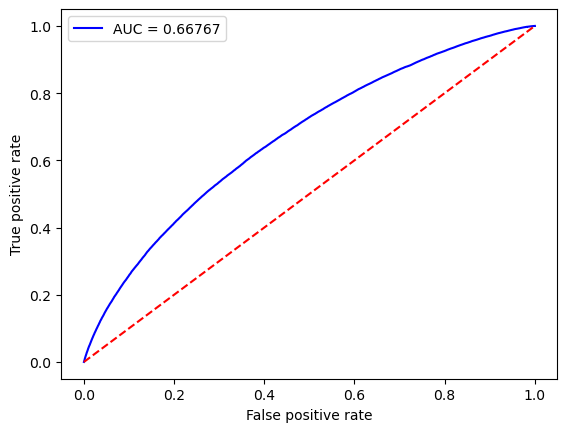

In [19]:
#Roc Curve
fpr, tpr, thresholds = roc_curve(y_val, logreg_phat_val)
logreg_auc_val = roc_auc_score(y_val, logreg_phat_val)
plt.plot(fpr,tpr, "b", label = "AUC = %0.5f"%logreg_auc_val)
plt.plot([0,1],[0,1],"r--")
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

LASSO

In [20]:
from sklearn.linear_model import LogisticRegressionCV
# parameter Cs= Each of the values in Cs describes the inverse of regularization strength.
# If Cs is as an int, then a grid of Cs values are chosen in a logarithmic scale between 1e-4 and 1e4.
# Like in support vector machines, smaller values specify stronger regularization.
# c_values = np.exp(np.arange(10,-1,-0.25))**-1

#parameter cv= number of folds to use in cross validation

lassocv_model = LogisticRegressionCV(penalty="l1", solver="saga", Cs = 40, cv = 5, max_iter = 3500, n_jobs = -1,verbose = 0)
lassocv_model.fit(X_train,y_train)

LogisticRegressionCV(Cs=40, cv=5, max_iter=3500, n_jobs=-1, penalty='l1',
                     solver='saga')

In [21]:
lassocv_yhat_val = lassocv_model.predict(X_val)
lassocv_phat_val = lassocv_model.predict_proba(X_val)[:,1]

print("num of coefs that have been shrunk to 0: ", (lassocv_model.coef_ == 0).sum())
print("L1 norm of coefficients: ", np.abs(lassocv_model.coef_).sum())
print("L2 norm of coefficients: ", (lassocv_model.coef_**2).sum())
print("acc_score function from sklearn: ", accuracy_score(y_val,lassocv_yhat_val))
print(classification_report(y_val,lassocv_yhat_val))
print("Coefficients of LASSO model")
(pd.Series(lassocv_model.coef_[0], index = lassocv_model.feature_names_in_)).sort_values()

num of coefs that have been shrunk to 0:  1
L1 norm of coefficients:  11.288814686769294
L2 norm of coefficients:  10.124313446814828
acc_score function from sklearn:  0.7107045157662275
              precision    recall  f1-score   support

           0       0.85      0.77      0.81    275803
           1       0.32      0.45      0.37     65623

    accuracy                           0.71    341426
   macro avg       0.59      0.61      0.59    341426
weighted avg       0.75      0.71      0.73    341426

Coefficients of LASSO model


loan_amnt                          -1.785497
sub_grade                          -0.720402
int_rate                           -0.685634
total_acc                          -0.120376
fico_range_low                     -0.109531
fico_range_high                    -0.102192
emp_length                         -0.083816
total_bal_ex_mort                  -0.078116
mths_since_recent_bc               -0.049085
mo_sin_rcnt_tl                     -0.044499
num_bc_tl                          -0.042585
num_actv_bc_tl                     -0.031149
annual_inc                         -0.026488
pub_rec_bankruptcies               -0.024208
pct_tl_nvr_dlq                     -0.020487
earliest_cr_line                   -0.010977
grade                              -0.009372
num_accts_ever_120_pd              -0.003154
tax_liens                           0.000000
disbursement_method_DirectPay       0.006612
acc_now_delinq                      0.007179
purpose_wedding                     0.009035
open_acc  

88.86238162743408 	 this is the optimal lambda parameter


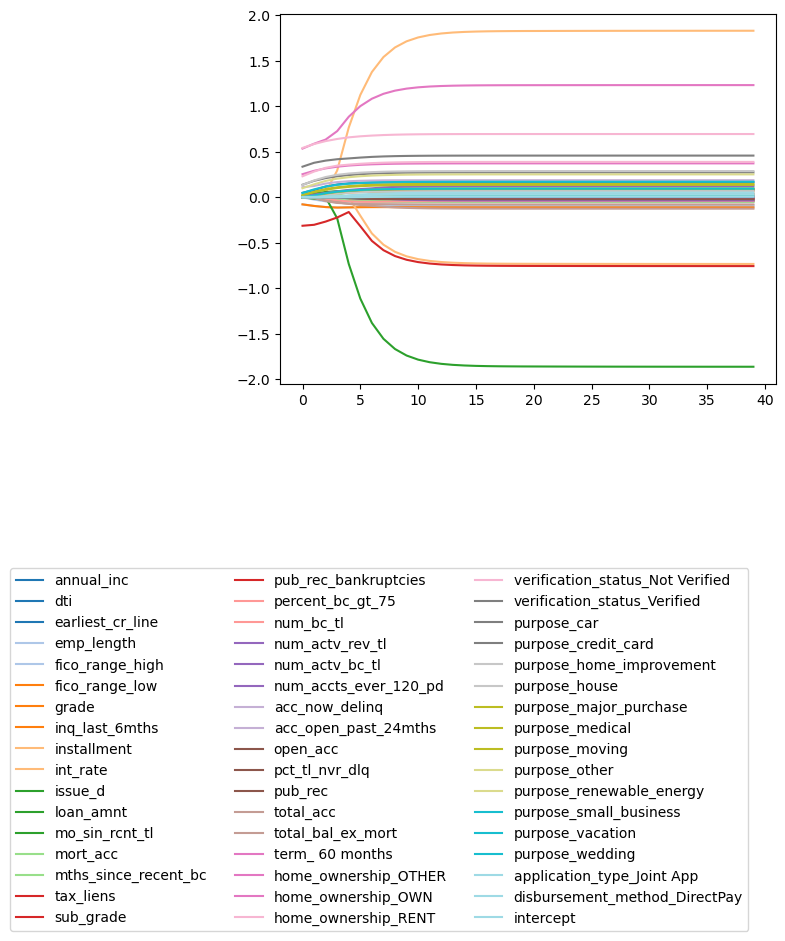

In [22]:
print((lassocv_model.C_**-1)[0],"\t this is the optimal lambda parameter")
col_names = list(lassocv_model.feature_names_in_)
pd.DataFrame(lassocv_model.coefs_paths_[1].mean(axis=0),columns=col_names+["intercept"]).plot(linewidth=1.5,colormap="tab20")
plt.legend(loc='lower center', bbox_to_anchor=(0.2, -1.5),ncols=3)

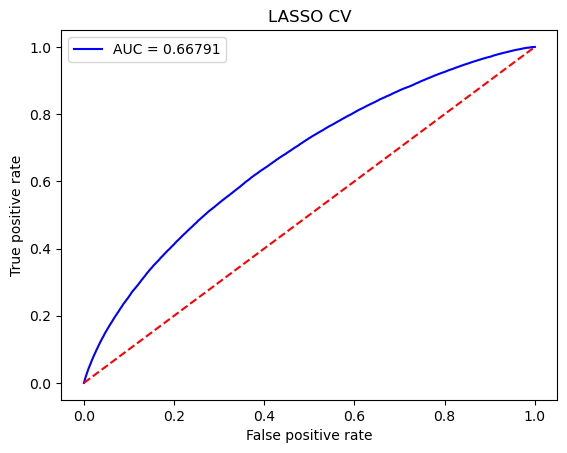

In [23]:
fpr, tpr, thresholds = roc_curve(y_val, lassocv_phat_val)
lassocv_auc_val = roc_auc_score(y_val, lassocv_phat_val)
plt.plot(fpr,tpr, "b", label = "AUC = %0.5f"%lassocv_auc_val)
plt.plot([0,1],[0,1],"r--")
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("LASSO CV")
plt.show()

Ridge

In [24]:
from sklearn.linear_model import LogisticRegressionCV
# parameter Cs= Each of the values in Cs describes the inverse of regularization strength.
# If Cs is as an int, then a grid of Cs values are chosen in a logarithmic scale between 1e-4 and 1e4.
# Like in support vector machines, smaller values specify stronger regularization.

#parameter cv= number of folds to use in cross validation

ridgecv_model = LogisticRegressionCV(penalty="l2", solver="saga", Cs = 40, cv = 5, max_iter = 3500, n_jobs = -1,verbose = 0)
ridgecv_model.fit(X_train,y_train)

LogisticRegressionCV(Cs=40, cv=5, max_iter=3500, n_jobs=-1, solver='saga')

In [25]:
ridgecv_yhat_val = ridgecv_model.predict(X_val)
ridgecv_phat_val = ridgecv_model.predict_proba(X_val)[:,1]

print("num of coefs that have been shrunk to 0: ", (ridgecv_model.coef_ == 0).sum())
print("L1 norm of coefficients: ", np.abs(ridgecv_model.coef_).sum())
print("L2 norm of coefficients: ", (ridgecv_model.coef_**2).sum())
print("acc_score function from sklearn: ", accuracy_score(y_val,ridgecv_yhat_val))
print(classification_report(y_val,ridgecv_yhat_val))

print("Coefficients of Ridge")
(pd.Series(ridgecv_model.coef_[0], index = ridgecv_model.feature_names_in_)).sort_values()



num of coefs that have been shrunk to 0:  0
L1 norm of coefficients:  11.549871376574103
L2 norm of coefficients:  10.645404507871072
acc_score function from sklearn:  0.7107748091826633
              precision    recall  f1-score   support

           0       0.85      0.77      0.81    275803
           1       0.32      0.45      0.37     65623

    accuracy                           0.71    341426
   macro avg       0.59      0.61      0.59    341426
weighted avg       0.75      0.71      0.73    341426

Coefficients of Ridge


loan_amnt                          -1.837733
sub_grade                          -0.751968
int_rate                           -0.724004
total_acc                          -0.124556
fico_range_low                     -0.107575
fico_range_high                    -0.104376
emp_length                         -0.084776
total_bal_ex_mort                  -0.078662
mths_since_recent_bc               -0.050008
mo_sin_rcnt_tl                     -0.044653
num_bc_tl                          -0.041375
num_actv_bc_tl                     -0.035151
pub_rec_bankruptcies               -0.031110
annual_inc                         -0.027408
pct_tl_nvr_dlq                     -0.021413
earliest_cr_line                   -0.012325
grade                              -0.010001
tax_liens                          -0.006785
num_accts_ever_120_pd              -0.004831
disbursement_method_DirectPay       0.007427
acc_now_delinq                      0.007628
purpose_wedding                     0.009835
open_acc  

8.376776400682925 	 this is the optimal lambda parameter


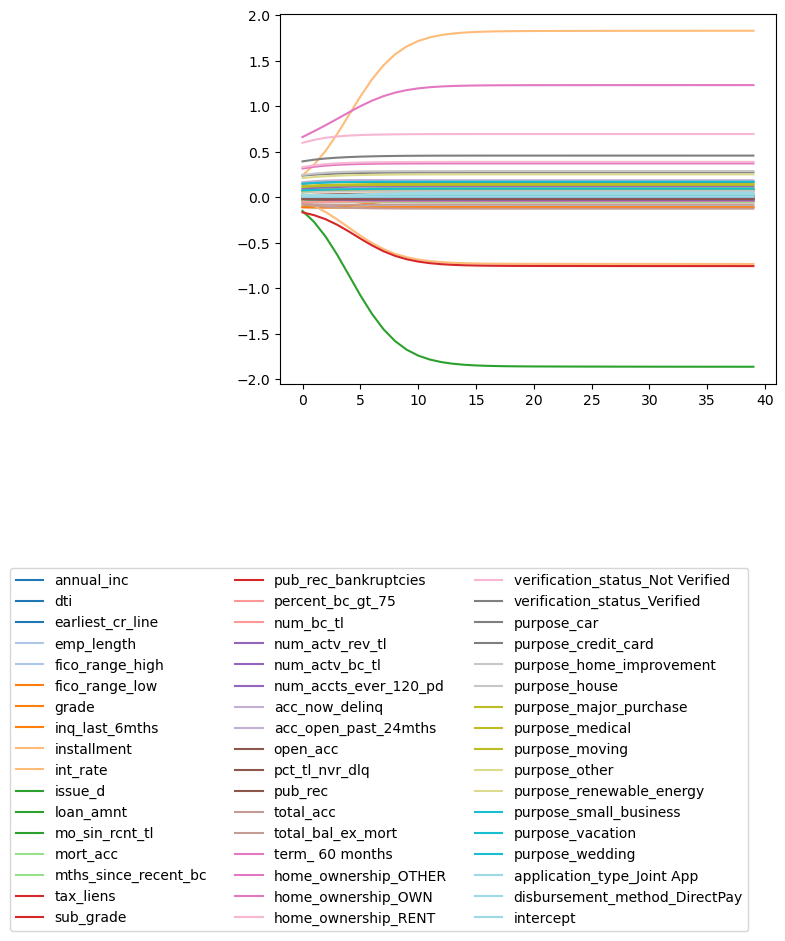

In [26]:
print((ridgecv_model.C_**-1)[0],"\t this is the optimal lambda parameter")
col_names = list(ridgecv_model.feature_names_in_)
pd.DataFrame(ridgecv_model.coefs_paths_[1].mean(axis=0),columns=col_names+["intercept"]).plot(linewidth=1.5,colormap="tab20")
plt.legend(loc='lower center', bbox_to_anchor=(0.2, -1.5),ncols=3)

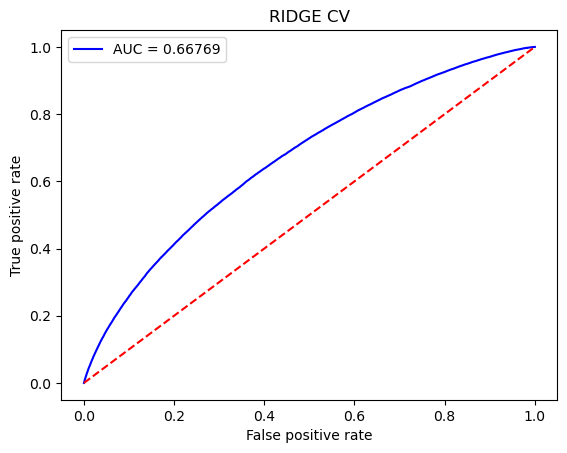

In [27]:
fpr, tpr, thresholds = roc_curve(y_val, ridgecv_phat_val)
ridgecv_auc_val = roc_auc_score(y_val, ridgecv_phat_val)
plt.plot(fpr,tpr, "b", label = "AUC = %0.5f"%ridgecv_auc_val)
plt.plot([0,1],[0,1],"r--")
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("RIDGE CV")
plt.show()

Elastic net

In [28]:
from sklearn.linear_model import LogisticRegressionCV
# parameter Cs= Each of the values in Cs describes the inverse of regularization strength.
# If Cs is as an int, then a grid of Cs values are chosen in a logarithmic scale between 1e-4 and 1e4.
# Like in support vector machines, smaller values specify stronger regularization.

#parameter cv= number of folds to use in cross validation

elasticnetcv_model = LogisticRegressionCV(penalty="elasticnet", solver="saga", Cs = 40, cv = 5, 
                                          l1_ratios= [0.5], max_iter = 3500, n_jobs = -1,verbose = 0)
elasticnetcv_model.fit(X_train,y_train)

LogisticRegressionCV(Cs=40, cv=5, l1_ratios=[0.5], max_iter=3500, n_jobs=-1,
                     penalty='elasticnet', solver='saga')

In [29]:
elasticnetcv_yhat_val = elasticnetcv_model.predict(X_val)
elasticnetcv_phat_val = elasticnetcv_model.predict_proba(X_val)[:,1]
print("num of coefs that have been shrunk to 0: ", (elasticnetcv_model.coef_ == 0).sum())
print("L1 norm of coefficients: ", np.abs(elasticnetcv_model.coef_).sum())
print("L2 norm of coefficients: ", (elasticnetcv_model.coef_**2).sum())
print("acc_score function from sklearn: ", accuracy_score(y_val,elasticnetcv_yhat_val))
print(classification_report(y_val,elasticnetcv_yhat_val))

print("coefficients of Elastic net")
(pd.Series(elasticnetcv_model.coef_[0], index = elasticnetcv_model.feature_names_in_)).sort_values()


num of coefs that have been shrunk to 0:  1
L1 norm of coefficients:  10.502593285597063
L2 norm of coefficients:  8.158760395811818
acc_score function from sklearn:  0.7101070217265235
              precision    recall  f1-score   support

           0       0.86      0.77      0.81    275803
           1       0.32      0.45      0.37     65623

    accuracy                           0.71    341426
   macro avg       0.59      0.61      0.59    341426
weighted avg       0.75      0.71      0.73    341426

coefficients of Elastic net


loan_amnt                          -1.550032
sub_grade                          -0.618135
int_rate                           -0.575879
total_acc                          -0.114984
fico_range_low                     -0.107534
fico_range_high                    -0.106345
emp_length                         -0.082597
total_bal_ex_mort                  -0.078258
mths_since_recent_bc               -0.048422
num_bc_tl                          -0.044628
mo_sin_rcnt_tl                     -0.044579
num_actv_bc_tl                     -0.026521
annual_inc                         -0.026408
grade                              -0.026088
pub_rec_bankruptcies               -0.021834
pct_tl_nvr_dlq                     -0.019802
earliest_cr_line                   -0.009014
num_accts_ever_120_pd              -0.001279
tax_liens                           0.000000
disbursement_method_DirectPay       0.005453
acc_now_delinq                      0.007057
purpose_wedding                     0.007987
open_acc  

366.5241237079626 	 this is the optimal lambda parameter


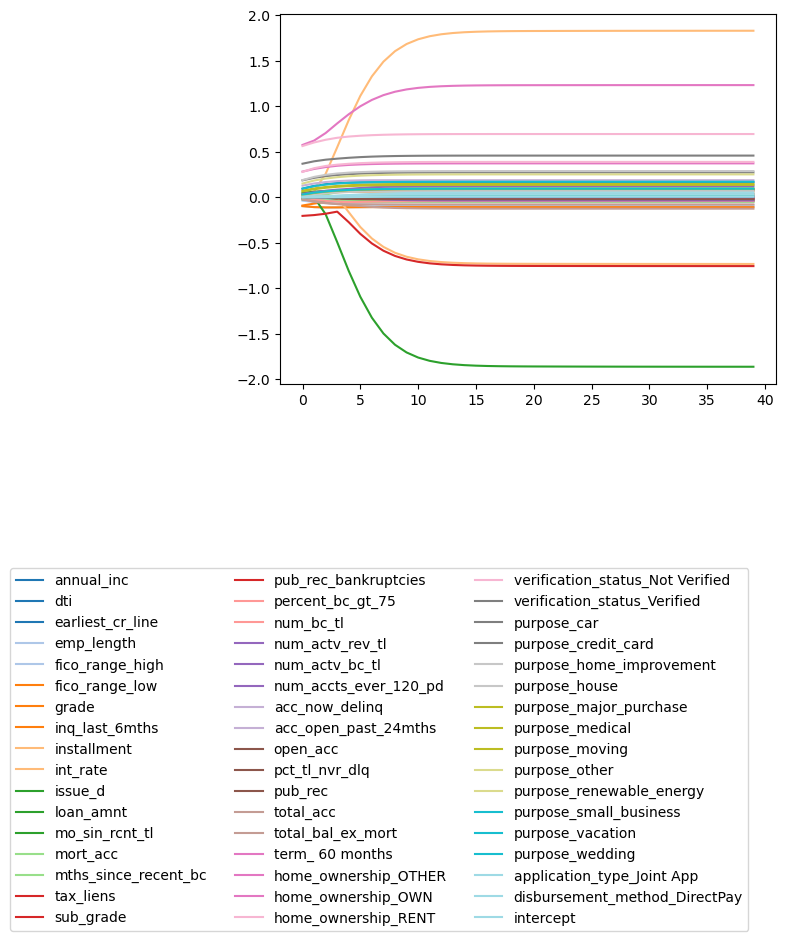

In [30]:
print((elasticnetcv_model.C_**-1)[0],"\t this is the optimal lambda parameter")
col_names = list(elasticnetcv_model.feature_names_in_)
pd.DataFrame(elasticnetcv_model.coefs_paths_[1][:,:,0,:].mean(axis=0),columns=col_names+["intercept"]).plot(linewidth=1.5,colormap="tab20")
plt.legend(loc='lower center', bbox_to_anchor=(0.2, -1.5),ncols=3)

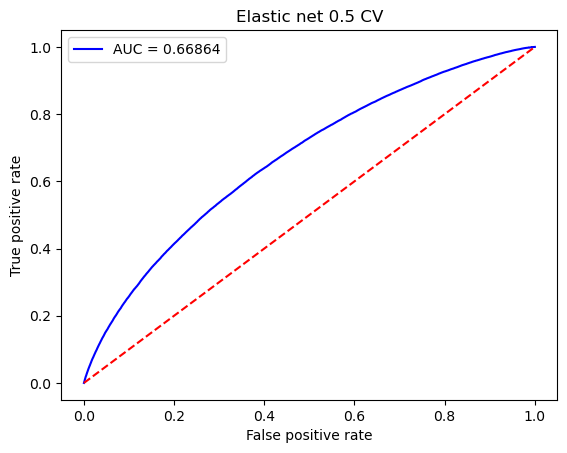

In [31]:
fpr, tpr, thresholds = roc_curve(y_val, elasticnetcv_phat_val)
elasticnetcv_auc_val = roc_auc_score(y_val, elasticnetcv_phat_val)
plt.plot(fpr,tpr, "b", label = "AUC = %0.5f"%elasticnetcv_auc_val)
plt.plot([0,1],[0,1],"r--")
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Elastic net 0.5 CV")
plt.show()

## Tree based models

Random forest


Il parametro n_estimators nel costruttore RandomForestClassifier indica il numero di alberi decisionali che compongono il Random Forest.

Aumentare il valore di n_estimators generalmente porta a una maggiore complessità del modello e può migliorare le prestazioni predittive, riducendo il rischio di overfitting. Tuttavia, aumentare n_estimators può anche aumentare il tempo di addestramento e il consumo di memoria.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

random_forest = RandomForestClassifier(n_estimators=250, random_state=42)

# Addestra il classificatore sul set di addestramento
random_forest.fit(X_train, y_train)

# Effettua previsioni sul set di test
random_forest_yhat_val = random_forest.predict(X_val)

# Valuta l'accuratezza del modello
classification_report_random_forest = classification_report(y_val, random_forest_yhat_val)
print("risultati:\n", f"accuracy: {accuracy_score(y_val,random_forest_yhat_val):5f}", classification_report_random_forest,sep="\n")

risultati:

accuracy: 0.805615
              precision    recall  f1-score   support

           0       0.82      0.97      0.89    275803
           1       0.48      0.13      0.20     65623

    accuracy                           0.81    341426
   macro avg       0.65      0.55      0.54    341426
weighted avg       0.76      0.81      0.76    341426



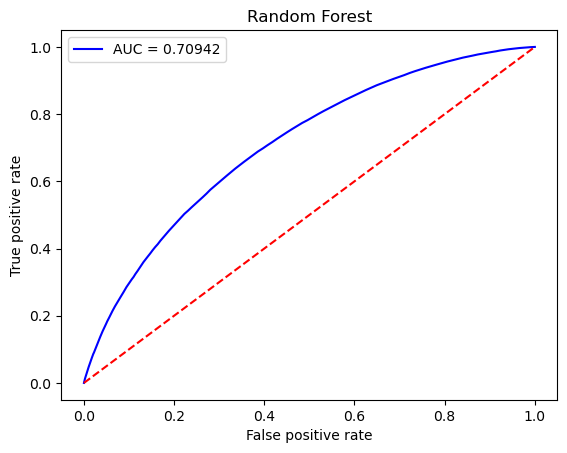

In [33]:
random_forest_phat_val = random_forest.predict_proba(X_val)[:,1]

fpr, tpr, thresholds = roc_curve(y_val, random_forest_phat_val)
random_forest_auc_val = roc_auc_score(y_val, random_forest_phat_val)
plt.plot(fpr,tpr, "b", label = "AUC = %0.5f"%random_forest_auc_val)
plt.plot([0,1],[0,1],"r--")
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Random Forest")
plt.show()

XGBOOST


In [34]:
import xgboost as xgb

# Crea un oggetto DMatrix XGBoost per i dati di addestramento e test
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Definisci i parametri per il modello XGBoost
params = {
    'objective': 'binary:logistic',  # obiettivo: è classificazione binaria
    'eval_metric': 'auc'  # metrica di valutazione: auc
}

# Addestra il modello XGBoost
num_rounds = 5000
model = xgb.train(params, dtrain, num_rounds)

# Effettua le previsioni sul set di test
predictions = model.predict(dval)

# Calcola l'AUC-ROC
auc_roc = roc_auc_score(y_val, predictions)
print("AUC-ROC:", auc_roc)

#accuracy
print(accuracy_score(y_val, predictions>0.5))

AUC-ROC: 0.6760613549595225
0.7925699858827389



Per trovare i coefficienti in un modello XGBoost (Extreme Gradient Boosting), devi prima comprendere che XGBoost non utilizza coefficienti nel modo in cui lo fanno i modelli lineari come la regressione lineare. Invece, XGBoost addestra un insieme di alberi decisionali, ognuno dei quali fornisce contributi alle previsioni finali.

Se intendi trovare l'importanza delle feature nel modello XGBoost, puoi farlo utilizzando l'attributo feature_importances_. Questo attributo restituirà un array contenente l'importanza relativa di ciascuna feature nel modello. Puoi ottenere una rappresentazione grafica di queste importanze utilizzando la libreria matplotlib.

**weight**: Questo tipo di importanza rappresenta il numero di volte in cui una feature è stata utilizzata per suddividere i dati in tutti gli alberi del modello. È un'indicazione di quanto spesso una feature è stata considerata importante per la divisione dei dati.

**gain**: Questo tipo di importanza rappresenta il guadagno medio ottenuto quando una feature è stata utilizzata per dividere i dati in tutti gli alberi del modello. Il guadagno è una misura di quanto il modello ha ridotto l'errore utilizzando quella particolare feature per dividere i dati.

**cover**: Questo tipo di importanza rappresenta la copertura media ottenuta quando una feature è stata utilizzata per dividere i dati in tutti gli alberi del modello. La copertura è una misura della quantità di dati che vengono gestiti da una particolare divisione.

**total_gain**: Questo tipo di importanza rappresenta il guadagno totale ottenuto quando una feature è stata utilizzata per dividere i dati in tutti gli alberi del modello. È la somma del guadagno su tutte le divisioni in cui la feature è stata coinvolta.

**total_cover**: Questo tipo di importanza rappresenta la copertura totale ottenuta quando una feature è stata utilizzata per dividere i dati in tutti gli alberi del modello. È la somma della copertura su tutte le divisioni in cui la feature è stata coinvolta.

<Figure size 2500x2500 with 0 Axes>

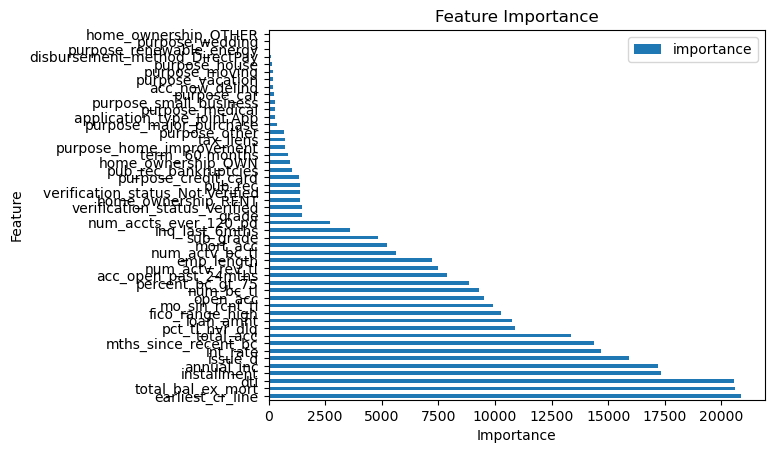

In [35]:
# Ottieni l'importanza delle feature
importance = model.get_score(importance_type='weight')

# Converti l'importanza delle feature in un DataFrame
importance_df = pd.DataFrame.from_dict(importance, orient='index', columns=['importance'])
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Visualizza l'importanza delle feature
plt.figure(figsize=(25, 25))
importance_df.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

<Axes: ylabel='Frequency'>

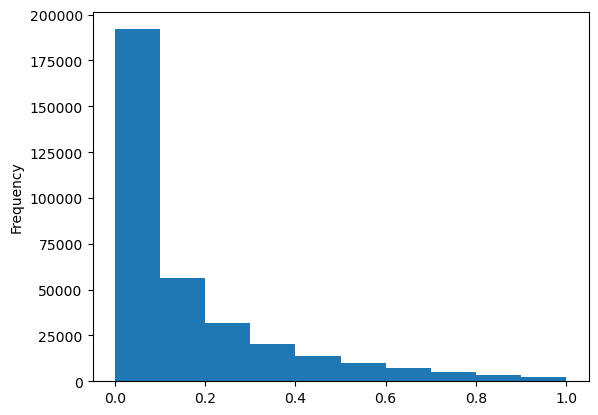

In [36]:
pd.Series(predictions).plot(kind="hist")

In [37]:
sorted(importance.items(),key = lambda item: item[1],reverse=True)

[('earliest_cr_line', 20857.0),
 ('total_bal_ex_mort', 20578.0),
 ('dti', 20536.0),
 ('installment', 17337.0),
 ('annual_inc', 17199.0),
 ('issue_d', 15923.0),
 ('int_rate', 14685.0),
 ('mths_since_recent_bc', 14380.0),
 ('total_acc', 13365.0),
 ('pct_tl_nvr_dlq', 10882.0),
 ('loan_amnt', 10732.0),
 ('fico_range_high', 10270.0),
 ('mo_sin_rcnt_tl', 9911.0),
 ('open_acc', 9493.0),
 ('num_bc_tl', 9290.0),
 ('percent_bc_gt_75', 8848.0),
 ('acc_open_past_24mths', 7892.0),
 ('num_actv_rev_tl', 7494.0),
 ('emp_length', 7219.0),
 ('num_actv_bc_tl', 5644.0),
 ('mort_acc', 5240.0),
 ('sub_grade', 4818.0),
 ('inq_last_6mths', 3602.0),
 ('num_accts_ever_120_pd', 2730.0),
 ('grade', 1478.0),
 ('verification_status_Verified', 1460.0),
 ('home_ownership_RENT', 1411.0),
 ('verification_status_Not Verified', 1387.0),
 ('pub_rec', 1376.0),
 ('purpose_credit_card', 1356.0),
 ('pub_rec_bankruptcies', 1050.0),
 ('home_ownership_OWN', 955.0),
 ('term_ 60 months', 872.0),
 ('purpose_home_improvement', 745.0

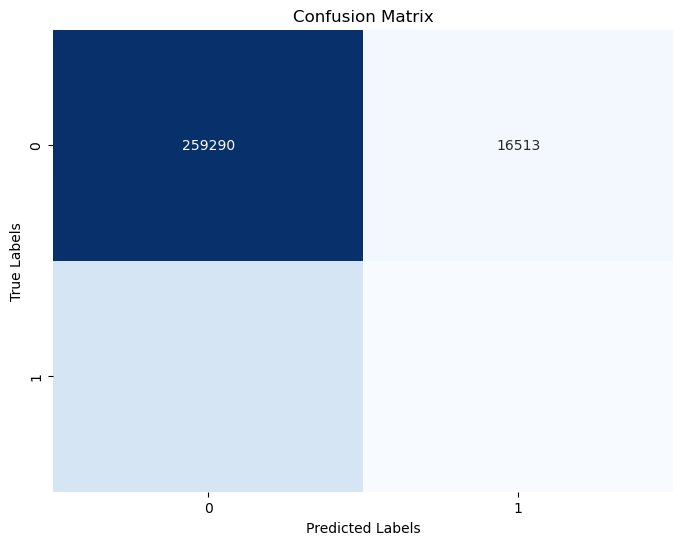

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, predictions > 0.5)

# Visualizzazione della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [39]:
cm

array([[259290,  16513],
       [ 54309,  11314]], dtype=int64)

In [40]:
# Estrai i valori dalla matrice di confusione
tn, fp, fn, tp = cm.ravel()
# Calcola la sensitivity
sensitivity = tp / (tp + fn)
# Calcola la specificity
specificity = tn / (tn + fp)
predizione_rate = (tp+tn)/(tn+tp+fp+fn)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", predizione_rate)

Sensitivity: 0.17240906389528063
Specificity: 0.9401275548126743
Accuracy: 0.7925699858827389


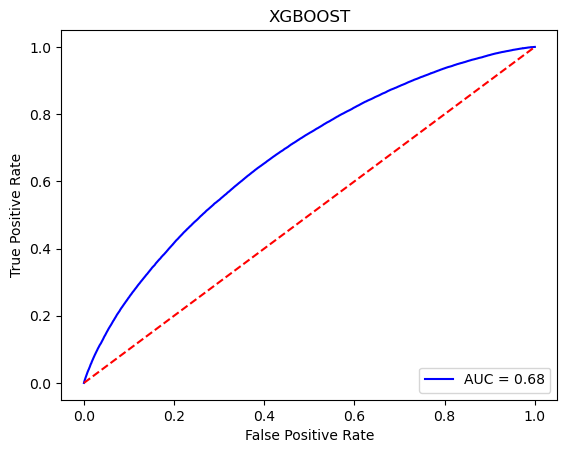

In [41]:
from sklearn.metrics import auc
fpr, tpr, threshold = roc_curve(y_val, predictions)
roc_auc_xgboost = auc(fpr, tpr)
plt.title('XGBOOST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_xgboost)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([-0.01, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

BART